# Analysez des données de systèmes éducatifs

## Introduction

### Objectifs

- Valider la qualité de ce jeu de données :
  - Comporte-t-il beaucoup de données manquantes ?
  - Comporte-t-il beaucoup de données dupliquées ?
- Décrire les informations contenues dans le jeu de données :
  - Nombre de colonnes ?
  - Nombre de lignes ?
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique :
  - Quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde :
  - Moyenne
  - Médiane
  - Écart-type par pays / par continent ou bloc géographique

### Problématique

__Ce jeu de donnée peut-il informer les décisions d'ouverture vers de nouveaux pays pour une start-up qui propose des contenus de formation en ligne pour un public de niveau lycée et université ?__

## Setup

### Install Python

From [here](https://www.python.org/downloads/)

### Create a virtual environment

Via VSC : Cmd + Shft + P -> 'Python: Create Environment' -> Venv -> Choose Python to use as base
Created venv is activated automatically.

### Install jupyter

Send `pip install notebook` in a terminal.

### Launch jupyter notebook

Send `jupyter notebook` to open jupyter.
Create a new notebook.

### Install pandas

In [2]:
# install in virtual environment
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


#### Check the version of the installed package

In [ ]:
%pip list # get the list of all packages installed, then find pandas -> version is 2.2.3

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# other method to return pandas version directly
%pip freeze | findstr pandas

pandas==2.2.3
Note: you may need to restart the kernel to use updated packages.


[This website](https://pandas.pydata.org/) tells us that 2.2.3 is the latest version.

## Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno as msno
from typing import Optional, Callable

In [2]:
ed_stats_country = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv')
ed_stats_country_series = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv')
ed_stats_data = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsData.csv')
ed_stats_foot_note = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv')
ed_stats_series = pd.read_csv('Projet+Python_Dataset_Edstats_csv/EdStatsSeries.csv')

<Axes: >

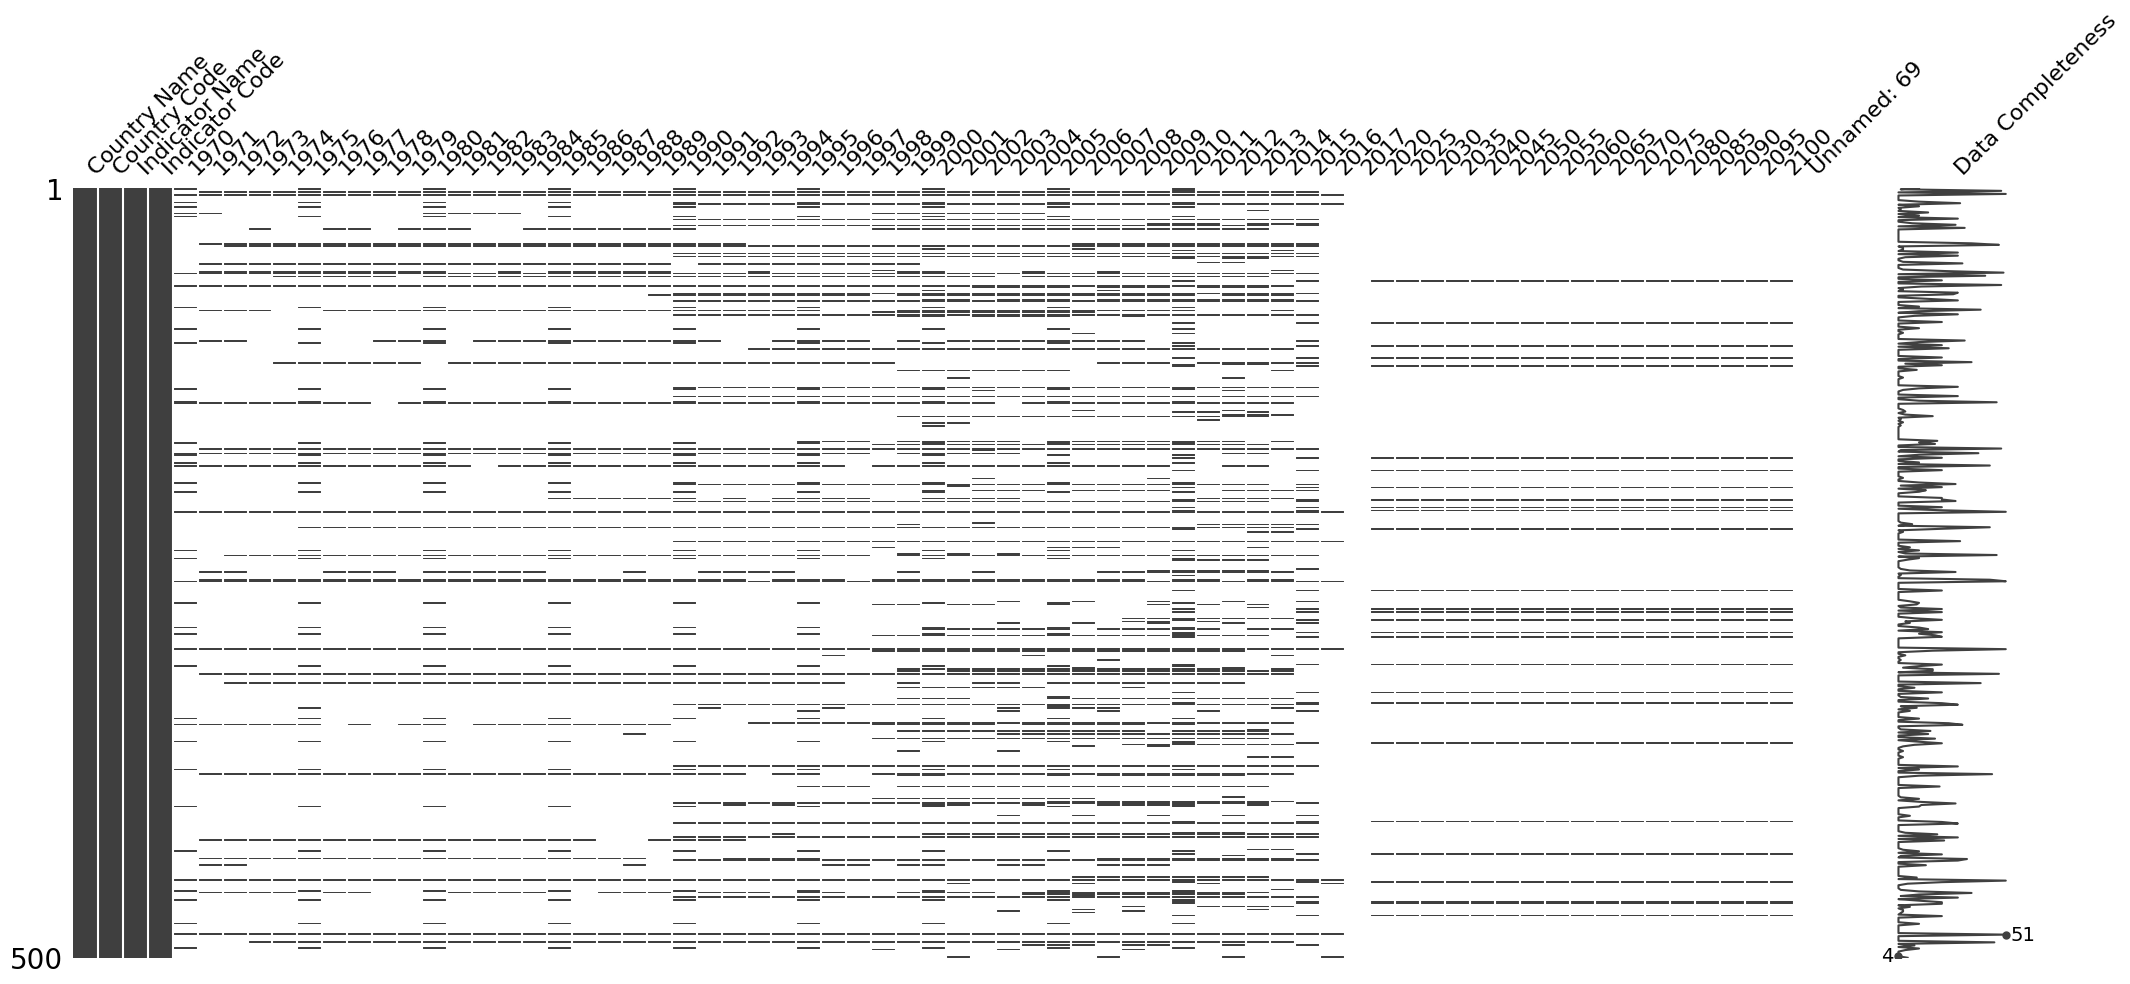

In [3]:
msno.matrix(ed_stats_data.sample(500), labels=ed_stats_data.columns.tolist())

## Explore data

### EdStatsCountry.csv

In [14]:
# General info

ed_stats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [12]:
ed_stats_country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

There are too many columns to get a decent overview of the values in all of them. Visual Studio Code extension "Data Wrangler" is used to have a better overview.

#### Fix dtypes

Here are the possible wrongly-assigned types:
- Column "National accounts base year" is of type "object". Converting it to numeric is not possible because some values are a combination of several years (for example "2002/03").
- Column "PPP survey year" is of type "object". Converting it to numeric is not possible because some values are strings (for example "Rolling").

#### Remove useless columns

In [9]:
ed_stats_country.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

In [4]:
ed_stats_country.drop(columns=["Unnamed: 31", "2-alpha code", "WB-2 code"], inplace=True)

### EdStatsData.csv

In [25]:
# General info

ed_stats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [26]:
ed_stats_data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

There are too many columns to get a decent overview of the values in all of them. Visual Studio Code extension "Data Wrangler" is used to have a better overview.

#### Fix dtypes

Nothing unusual about the dtypes.

#### Remove useless columns

In [42]:
ed_stats_data.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [5]:
ed_stats_data.dropna(axis=1, how='all', inplace=True)

#### Remove useless lines

In [87]:
years = ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]
#ed_stats_data.dropna(axis=0, subset=years, how='all', inplace=True)

### EdStatsSeries.csv

In [45]:
# General info

ed_stats_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [46]:
ed_stats_series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

There are too many columns to get a decent overview of the values in all of them. Visual Studio Code extension "Data Wrangler" is used to have a better overview.

#### Fix dtypes

#### Remove useless columns

In [48]:
ed_stats_series.isna().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

In [6]:
ed_stats_series.dropna(axis=1, how='all', inplace=True)

### EdStatsCountry-Series.csv

In [51]:
# General info

ed_stats_country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [53]:
ed_stats_country_series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

#### Fix dtypes

Nothing unusual about the dtypes.

#### Remove useless columns

In [7]:
ed_stats_country_series.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

In [7]:
ed_stats_country_series.dropna(axis=1, how='all', inplace=True)

### EdStatsFootNote.csv

In [66]:
# General info

ed_stats_foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [67]:
ed_stats_foot_note.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

#### Fix dtypes

Column "Year" seems to be formatted as "YR****", that is why it is an object.
Let's check it is always formatted like this.

In [8]:
ed_stats_foot_note.loc[~ed_stats_foot_note["Year"].str.match(r'YR\d{4}')]

CountryCode   SeriesCode    Year  \
150668         EAP  SP.POP.GROW  yr2012   
157898         ECA  SP.POP.GROW  yr2012   
172364         EMU  SP.POP.GROW  yr2012   
232331         HIC  SP.POP.GROW  yr2012   
308605         LAC  SP.POP.GROW  yr2012   
344095         LIC  SP.POP.GROW  yr2012   
354902         LMC  SP.POP.GROW  yr2012   
360606         LMY  SP.POP.GROW  yr2012   
404072         MIC  SP.POP.GROW  yr2012   
416009         MNA  SP.POP.GROW  yr2012   
512858         SAS  SP.POP.GROW  yr2012   
537753         SSA  SP.POP.GROW  yr2012   
609268         UMC  SP.POP.GROW  yr2012   
630940         WLD  SP.POP.GROW  yr2012   

                                   DESCRIPTION  Unnamed: 4  
150668  5-year average value between 0s and 5s         NaN  
157898  5-year average value between 0s and 5s         NaN  
172364  5-year average value between 0s and 5s         NaN  
232331  5-year average value between 0s and 5s         NaN  
308605  5-year average value between 0s and 5s         NaN  
344095  5-year average value between 0s and 5s         NaN  
354902  5-year average value between 0s and 5s         NaN  
360606  5-year average value between 0s and 5s         NaN  
404072  5-year average value between 0s and 5s         NaN  
416009  5-year average value between 0s and 5s         NaN  
512858  5-year average value between 0s and 5s         NaN  
537753  5-year average value between 0s and 5s         NaN  
609268  5-year average value between 0s and 5s         NaN  
630940  5-year average value between 0s and 5s         NaN

Some contain "yr" instead of "YR".  
Let's convert in to a numeric value to prevent this.

In [9]:
ed_stats_foot_note.loc[:, "Year"] = ed_stats_foot_note.loc[:, "Year"].str[2:]

In [10]:
ed_stats_foot_note["Year"] = pd.to_numeric(ed_stats_foot_note["Year"])

In [11]:
ed_stats_foot_note.dtypes

CountryCode     object
SeriesCode      object
Year             int64
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

#### Remove useless columns

In [75]:
ed_stats_foot_note.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [11]:
ed_stats_foot_note.dropna(axis=1, how='all', inplace=True)

## Strategy

In order to answer the problem, we will build several custom scores based on the available indicators:

- Demographic Score : What is the amount of potential customers ?
- Economic Score : Is the population able to pay for online training ?
- Need Score : Is there a need for additional educational offers ?
- Ability Score : Is the population able to follow online training ?



### Remove irrelevant years

In order to answer those questions, we do not need to use data from all the years in the dataframe.  
Let's visualize the distribution of the percentage of filled data per year.

In [12]:
ed_stats_data.loc[:, ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]].isna().mean()*100

1970    91.849639
1971    95.993258
1972    95.984012
1973    95.992356
1974    95.971497
          ...    
2080    94.200670
2085    94.200670
2090    94.200670
2095    94.200670
2100    94.200670
Length: 65, dtype: float64

<Axes: >

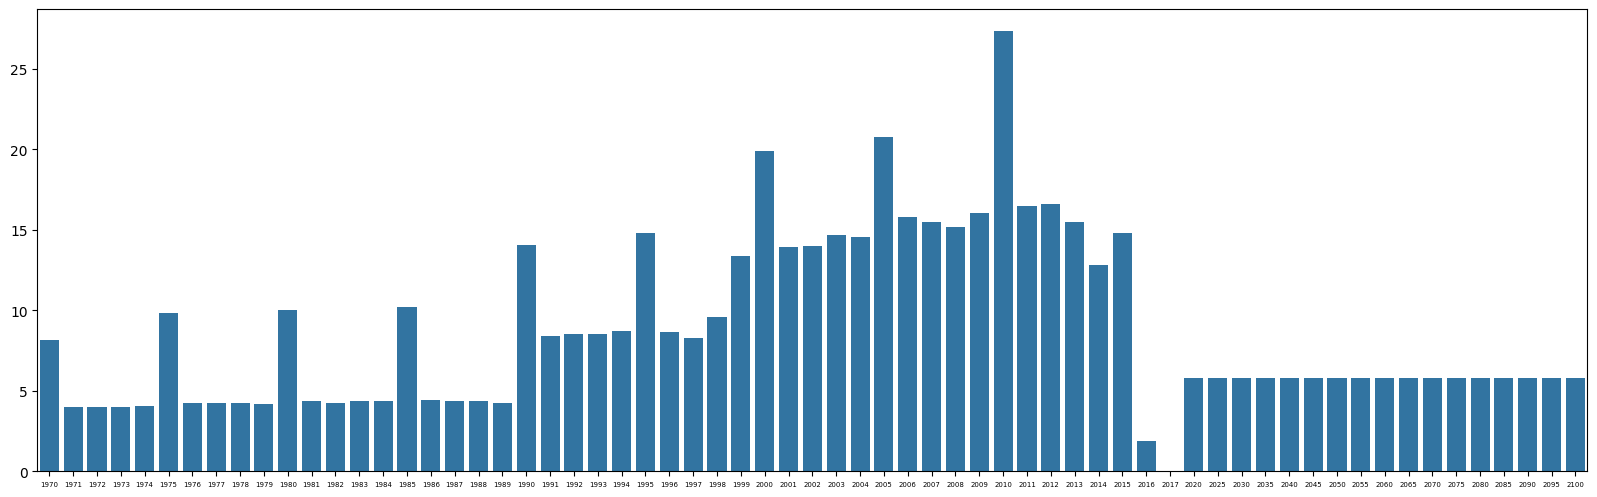

In [13]:
years = ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]
plt.figure(figsize=(20,6))
plt.xticks(fontsize=5)
sns.barplot(data=100*(1-ed_stats_data.loc[:, ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]].isna().mean()))

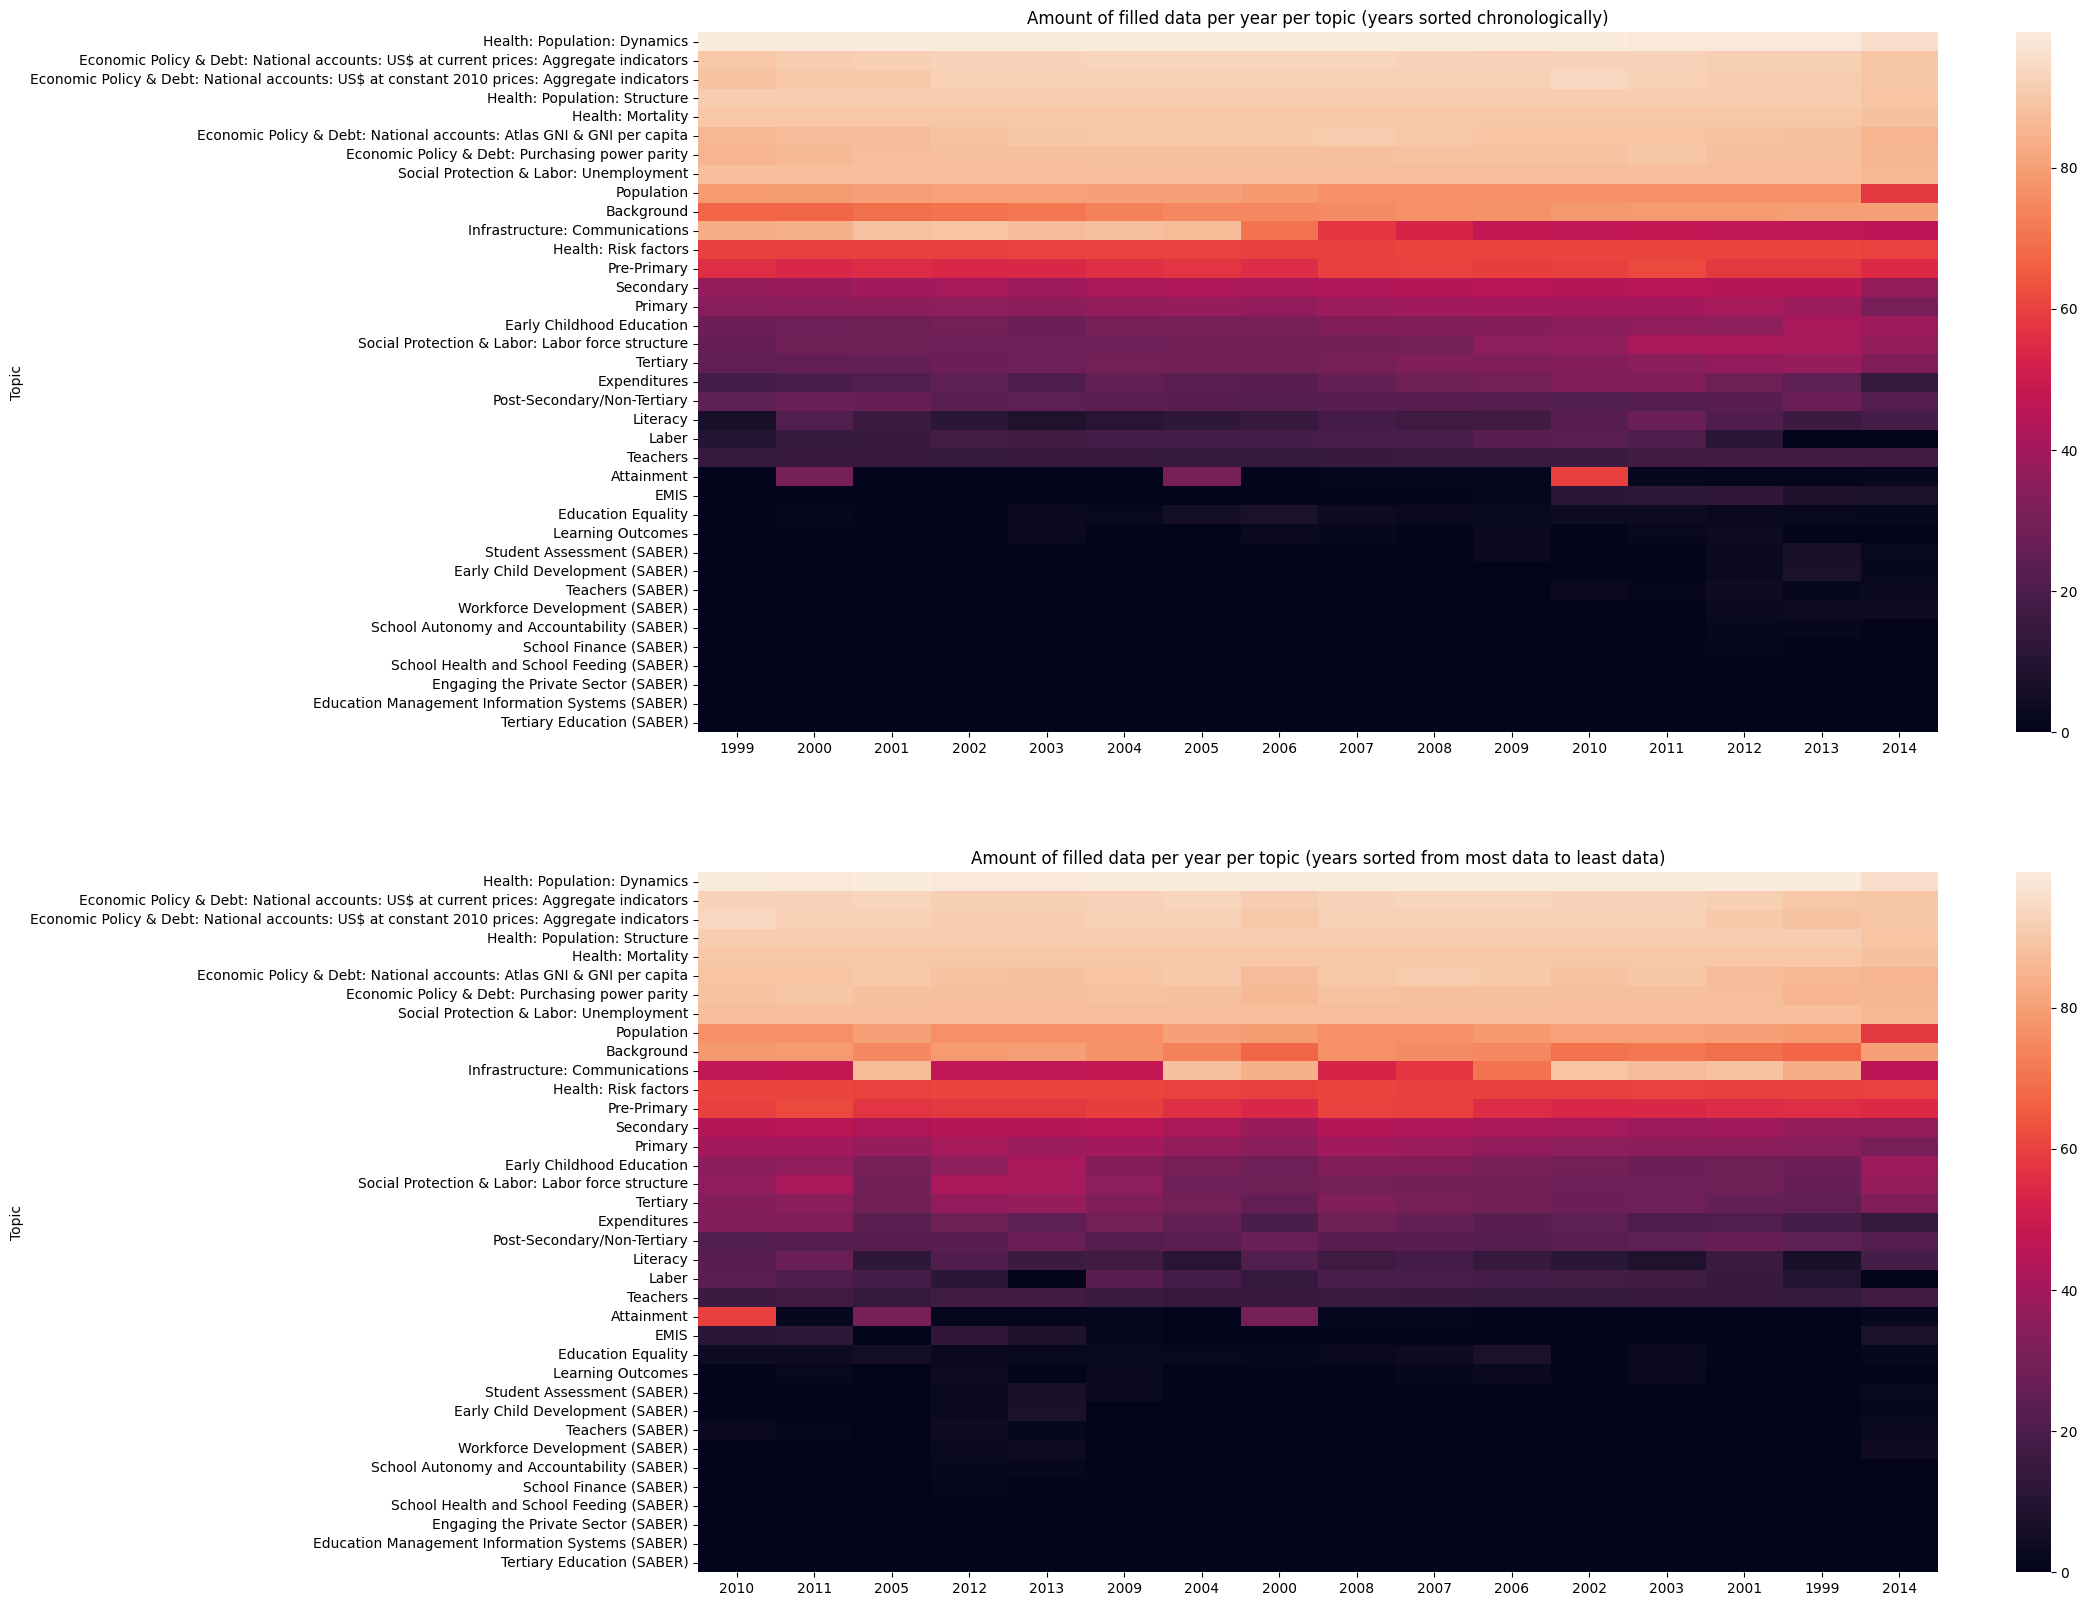

In [422]:
# Visualize missing values by topic
ed_stats_data_with_topics = ed_stats_data.merge(ed_stats_series.loc[:, ["Series Code", "Topic"]], how='left', left_on='Indicator Code', right_on='Series Code', )
missing_percentage = (
    ed_stats_data_with_topics.loc[:, ["Topic"] + [str(y) for y in ed_stats_data_with_topics.columns[ed_stats_data_with_topics.columns.str.isnumeric()]]]
    .groupby('Topic')
    .agg(lambda x: x.notna().mean() * 100)  # Calculate percentage of missing values
)

missing_percentage.loc[:, "Total"] = missing_percentage.sum(axis=1)
missing_percentage = missing_percentage.sort_values("Total", axis=0, ascending=False)

fig, axes = plt.subplots(2, figsize=(20,20))
axes[0].set_title("Amount of filled data per year per topic (years sorted chronologically)")
sns.heatmap(missing_percentage.loc[:, missing_percentage.columns != "Total"], ax=axes[0])

missing_percentage.loc["Total"] = missing_percentage.sum(axis=0)
missing_percentage = missing_percentage.sort_values("Total", axis=1 ,ascending=False)
axes[1].set_title("Amount of filled data per year per topic (years sorted from most data to least data)")
sns.heatmap(missing_percentage.loc[missing_percentage.index != "Total", missing_percentage.columns != "Total"], ax=axes[1])
plt.show()

Let's focus on the years from 1999 to 2014.

In [15]:
ed_stats_data.drop(columns=[y for y in ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()] if int(y) < 1999 or int(y) > 2014], inplace=True)

### Remove irrelevant countries

Countries are considered irrelevant for this analysis if there is not enough data (indicators) or if the number of potential customers is small.

Let's remove countries that have data for less than 15 indicators.

In [42]:
# Count the number of countries for each indicator after removing lines with no data
# ed_stats_data_dropped = ed_stats_data.dropna(how='all', subset=ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()])
# ed_stats_data_dropped["Country Name"].value_counts()

Country Name
Colombia                    2444
Ghana                       2358
Kazakhstan                  2320
Cameroon                    2292
Moldova                     2285
                            ... 
Channel Islands               23
Faroe Islands                 10
Isle of Man                    8
Northern Mariana Islands       6
St. Martin (French part)       2
Name: count, Length: 242, dtype: int64

In [43]:
# len(ed_stats_data_dropped["Country Name"].value_counts()[ed_stats_data_dropped["Country Name"].value_counts() < 15])

4

A country can only be relevant if there is data for a sufficient number of indicators. Let's remove all countries for which there is data for 15 indicators or less.

In [44]:
# Create list of countries to remove based on the threshold of 15 indicators at least
# countries_less15_to_remove = ed_stats_data_dropped["Country Name"].value_counts()[ed_stats_data_dropped["Country Name"].value_counts() < 15].index.tolist()

# Remove lines corresponding to countries to remove
# ed_stats_data = ed_stats_data.loc[~ed_stats_data["Country Name"].isin(countries_less15_to_remove)]

### Remove irrelevant indicators

Now let's choose relevant indicators to answer those questions.  
There are 3665 indicators in EdStatsSeries and EdStatsData. Let's filter them so that we only have the ones with most data.  

In [46]:
# Count the number of countries for each indicator
# ed_stats_data_dropped["Indicator Code"].value_counts()

Indicator Code
SP.POP.TOTL                240
SP.POP.GROW                240
NY.GDP.PCAP.CD             234
NY.GDP.MKTP.CD             234
IT.NET.USER.P2             230
                          ... 
LO.EGRA.ORF.ICI.2GRD         1
LO.EGRA.ORF.CIN.2GRD         1
LO.EGRA.ORF.CHI.2GRD         1
LO.EGRA.LSTN.0.SIL.2GRD      1
LO.EGRA.LSTN.0.LUV.2GRD      1
Name: count, Length: 3582, dtype: int64

An indicator can only be relevant if there is data for a sufficient number of countries. Let's remove all indicators for which there is data for 50 countries or less.

In [48]:
#len(ed_stats_data_dropped["Indicator Code"].value_counts()[ed_stats_data_dropped["Indicator Code"].value_counts() < 20])

879

In [15]:
# Create list of indicators to remove based on the threshold of 50 countries at least
#indicators_less50_to_remove = ed_stats_data["Indicator Code"].value_counts()[ed_stats_data["Indicator Code"].value_counts() < 50].index.tolist()

# Remove lines corresponding to indicators to remove
#ed_stats_data = ed_stats_data.loc[~ed_stats_data["Indicator Code"].isin(indicators_less50_to_remove)]

1336 indicators have been removed.

### Sort countries by population

In [115]:
country = 'CHN'
ind_code1 = "NY.GDP.PCAP.CD"
ind_code2 = "BAR.SCHL.15UP"

# Filter the DataFrame for the specific country and indicator codes
filtered_data = ed_stats_data.loc[
    (ed_stats_data["Country Code"] == country) & 
    (ed_stats_data["Indicator Code"].isin([ind_code1, ind_code2]))]

# Select relevant columns based on the condition that all values in 'years' are not null
valid_years = [year for year in years if filtered_data[year].notnull().all()]
country_df = filtered_data.loc[:, ["Indicator Code"] + valid_years]
country_df.set_index("Indicator Code", inplace=True)
country_df.transpose().reset_index(names="Year")

Indicator Code  Year  BAR.SCHL.15UP  NY.GDP.PCAP.CD
0               1970           3.58      113.162992
1               1975           4.10      178.341820
2               1980           4.86      194.804722
3               1985           5.31      294.458849
4               1990           5.59      317.884673
5               1995           6.32      609.656679
6               2000           6.93      959.372484
7               2005           7.29     1753.417829
8               2010           7.51     4560.512586

In [306]:
ed_stats_data_before_transforms = ed_stats_data.copy()

In [529]:
ed_stats_data = ed_stats_data_before_transforms.copy()

In [530]:
def discretize_data(s: pd.Series):
    # Ensure the series is of numeric type
    return s.rank(pct=True)

# Define the numeric columns you want to process
numeric_columns = ed_stats_data.select_dtypes(include=[np.number]).columns

for year in numeric_columns:
    # Apply the discretization function to each group of 'Indicator Code'
    ed_stats_data[str(year)] = (
        ed_stats_data.groupby("Indicator Code")[str(year)]
        .transform(lambda group: discretize_data(group) if group.notna().any() else group)
    )

In [500]:
def discretize_data(s:pd.Series):
    
    # Convert the column to percentiles
    return s.rank(pct=True)

# Discretize all indicators from ed_stats_data
for year in ['2014']: #ed_stats_data.select_dtypes(include=[np.number]).columns:
    for ind in ed_stats_data["Indicator Code"].unique():
        print(ind)
        ed_stats_data.loc[(ed_stats_data['Indicator Code'] == ind) & (ed_stats_data[str(year)].notna()), str(year)] = discretize_data(ed_stats_data.loc[(ed_stats_data['Indicator Code'] == ind) & (ed_stats_data[str(year)].notna()), str(year)])


UIS.NERA.2
UIS.NERA.2.F
UIS.NERA.2.GPI
UIS.NERA.2.M
SE.PRM.TENR
SE.PRM.TENR.FE
UIS.NERA.1.GPI
SE.PRM.TENR.MA
UIS.NERA.3
UIS.NERA.3.F
UIS.NERA.3.GPI
UIS.NERA.3.M
UIS.NIRA.1
UIS.NIRA.1.F
UIS.NIRA.1.GPI
UIS.NIRA.1.M
UIS.LPP.AG15T99
UIS.LP.AG15T99
UIS.LP.AG15T99.F
UIS.LP.AG15T99.M
SE.ADT.LITR.ZS
SE.ADT.LITR.FE.ZS
UIS.LR.AG15T99.GPI
SE.ADT.LITR.MA.ZS
UIS.AFR.AGRADMG.1.PU
UIS.AFR.PBR.1.G1.PU.MATH
UIS.AFR.PBR.1.G2.PU.MATH
UIS.AFR.PBR.1.G3.PU.MATH
UIS.AFR.PBR.1.G4.PU.MATH
UIS.AFR.PBR.1.G5.PU.MATH
UIS.AFR.PBR.1.G6.PU.MATH
UIS.AFR.PBR.1.G7.PU.MATH
UIS.AFR.PBR.1.PU.MATH
UIS.AFR.PBR.1.G1.PU.READ
UIS.AFR.PBR.1.G2.PU.READ
UIS.AFR.PBR.1.G3.PU.READ
UIS.AFR.PBR.1.G4.PU.READ
UIS.AFR.PBR.1.G5.PU.READ
UIS.AFR.PBR.1.G6.PU.READ
UIS.AFR.PBR.1.G7.PU.READ
UIS.AFR.PBR.1.PU.READ
UIS.AFR.CS.1.PU
UIS.AFR.CS.MG.1.PU
UIS.AFR.CS.SG.1.G1.PU
UIS.AFR.CS.SG.1.G2.PU
UIS.AFR.CS.SG.1.G3.PU
UIS.AFR.CS.SG.1.G4.PU
UIS.AFR.CS.SG.1.G5.PU
UIS.AFR.CS.SG.1.G6.PU
UIS.AFR.CS.SG.1.G7.PU
UIS.AFR.CS.SG.1.PU
UIS.AFR.GTC.2.T
UIS.AFR.GTC.2

In [497]:
def discretize_data(s:pd.Series):
    
    # Convert the column to percentiles
    print(s.rank(pct=True).max())
    return s.rank(pct=True)


def remove_outliers(s: pd.Series) -> pd.Series:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1

    # Define the bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Remove rows with outliers
    s.loc[(s < lower_bound) | (s > upper_bound)] = np.nan

    return s


def handle_outliers(df:pd.DataFrame, funcs:list[Callable]):
    df_copy = df.copy()
    if funcs is not None and len(funcs) > 0:
        for f in funcs:
            # Iterate over numeric columns
            for col in df_copy.select_dtypes(include=[np.number]).columns:
                df_copy[col] = f(df_copy[col])

    return df_copy.dropna()


def get_correlation_params(df, ind1, ind2):
    df_copy = df.copy()
    
    # Calculate linear regression parameters using OLS method
    X = df_copy[[ind1]]
    Y = df_copy[ind2]

    # Add constant for OLS
    X.loc[:, 'intercept'] = 1.0
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
    
    return result.params[ind1], result.params['intercept'], result.rsquared, np.sqrt(result.rsquared)


def plot_correlation(df, ind1, ind2, a, b, rsquared, r, plot_title='title', plot_params:dict={}):
    x_reg_line = np.linspace(df[ind1].min(), df[ind1].max(), num=2)
    y_reg_line = a * x_reg_line + b

    if df.shape[0] > 2:
        fig, ax1 = plt.subplots()
        sns.scatterplot(ax=ax1, x=ind1, y=ind2, data=df, **plot_params)
        ax1.plot(x_reg_line, y_reg_line, color='blue', label='Regression Line')
        text_x = ax1.get_xlim()[1] + (ax1.get_xlim()[1] - ax1.get_xlim()[0])/20
        text_y = ax1.get_yticks()[-3]
        ax1.text(text_x, text_y, f"n = {df.shape[0]}\na = {round(a, 2)}\nb = {round(b, 2)}\nR = {round(r, 2)}\nR² = {round(rsquared, 2)}", fontsize=9, ha='left', color='black')
        ax1.set_title(plot_title)
        plt.show()


def predict(a, b, countries_to_predict, ind1, ind2):
    # Make predictions for countries to predict
    x = countries_to_predict[ind1]
    y = a * x + b

    # Combine results into a DataFrame
    results = pd.DataFrame({
        'Country Code': countries_to_predict['Country Code'],
        f'Predicted {ind2}': y
    })

    return results


def linear_regression(ind_code1:str, ind_code2:str, apply_predictions=False, plot=True, countries:list=ed_stats_country["Country Code"].tolist(), years=ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()], transform_data:Optional[Callable]=None):
    
    subset = ed_stats_data.loc[(ed_stats_data['Indicator Code'].isin([ind_code1, ind_code2])) & (ed_stats_data['Country Code'].isin(countries))]
        
    for year in years:
        # Pivot the DataFrame to get years as columns
        pivot_df = subset.pivot(index=['Country Code', 'Country Name'], 
                                columns='Indicator Code', 
                                values=str(year)).reset_index()
        
        countries_to_train = pivot_df[pivot_df[ind_code1].notna() & pivot_df[ind_code2].notna()]
        
        if countries_to_train.shape[0] > 3:
            countries_to_train = handle_outliers(countries_to_train, transform_data)

            a, b, rsquared, r = get_correlation_params(countries_to_train, ind_code1, ind_code2)

            if plot:
                title = f"Correlation between '{ed_stats_series.loc[ed_stats_series["Series Code"] == ind_code1, "Indicator Name"].values[0]}' and '{ed_stats_series.loc[ed_stats_series["Series Code"] == ind_code2, "Indicator Name"].values[0]}'"
                plot_correlation(df=countries_to_train, ind1=ind_code1, ind2=ind_code2, a=a, b=b, rsquared=rsquared, r=r, plot_title=title) #, plot_params={'hue':"Country Name", "legend":False}
        
        # Filter for countries that have Ind1 but not Ind2
        countries_to_predict = pivot_df.loc[pivot_df[ind_code1].notna() & pivot_df[ind_code2].isna(), ["Country Code", ind_code1]]

        if not countries_to_predict.empty:
            if transform_data is not None:
                countries_to_predict = handle_outliers(countries_to_predict, [f for f in transform_data if f != remove_outliers])

            predictions = predict(a, b, countries_to_predict, ind_code1, ind_code2)
            
            #print(predictions)

            if apply_predictions:
                # Apply transform_data functions to the existing values in ed_stats_data for ind_code2
                # if transform_data is not None:
                    # for f in transform_data:
                        # ed_stats_data.loc[(ed_stats_data['Indicator Code'].isin([ind_code1, ind_code2])) & (ed_stats_data[str(year)].notna()), str(year)] = f(ed_stats_data.loc[(ed_stats_data['Indicator Code'] == ind_code2) & (ed_stats_data[str(year)].notna()), str(year)])

                # Updateed_stats_data with predictions
                for _, row in predictions.iterrows():
                    ed_stats_data.loc[(ed_stats_data['Country Code'] == row['Country Code']) & (ed_stats_data['Indicator Code'] == ind_code2) & (ed_stats_data[str(year)].isna()), str(year)] = row[f'Predicted {ind_code2}']

C:\Users\HCYF5290\AppData\Local\Temp\1\ipykernel_12716\1284661917.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'intercept'] = 1.0


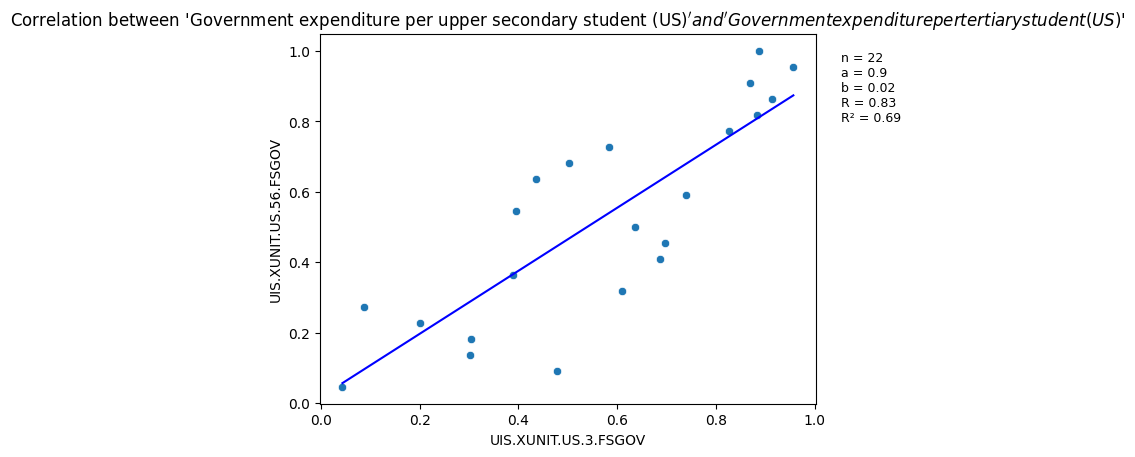

In [576]:
countries = ed_stats_country.loc[~(ed_stats_country["Special Notes"].fillna('').str.contains('aggregate')), "Country Code"].tolist()
linear_regression("SP.POP.TOTL", "UIS.E.3", apply_predictions=False, transform_data=[] , years=['2014'], countries=countries) # -> Could be interesting to not disctretize to perform some operations (sum of indicators for example)
linear_regression("NY.GDP.PCAP.CD", "UIS.XUNIT.US.3.FSGOV", apply_predictions=False, transform_data=[] , years=['2014'], countries=countries) # Same as above
linear_regression("SP.POP.TOTL", "UIS.E.3.GPV", apply_predictions=False, transform_data=[] , years=['2014'], countries=countries) # 


In [496]:
ed_stats_data.loc[(ed_stats_data['Indicator Code'] == "UIS.E.3.GPV") & (ed_stats_data[str(2014)].notna()), str(2014)].max()

np.float64(1.0)

In [516]:
ed_stats_data = ed_stats_data_before_transforms.copy()

In [425]:
ed_stats_data.loc[(ed_stats_data['Indicator Code'] == "UIS.E.3") & (ed_stats_data["2014"].isna())]

Country Name Country Code  \
100169                Algeria          DZA   
103834         American Samoa          ASM   
111164                 Angola          AGO   
118494              Argentina          ARG   
125824                  Aruba          ABW   
...                       ...          ...   
866154                Vietnam          VNM   
869819  Virgin Islands (U.S.)          VIR   
877149            Yemen, Rep.          YEM   
880814                 Zambia          ZMB   
884479               Zimbabwe          ZWE   

                                           Indicator Name Indicator Code  \
100169  Enrolment in upper secondary education, both s...        UIS.E.3   
103834  Enrolment in upper secondary education, both s...        UIS.E.3   
111164  Enrolment in upper secondary education, both s...        UIS.E.3   
118494  Enrolment in upper secondary education, both s...        UIS.E.3   
125824  Enrolment in upper secondary education, both s...        UIS.E.3   
...                                                   ...            ...   
866154  Enrolment in upper secondary education, both s...        UIS.E.3   
869819  Enrolment in upper secondary education, both s...        UIS.E.3   
877149  Enrolment in upper secondary education, both s...        UIS.E.3   
880814  Enrolment in upper secondary education, both s...        UIS.E.3   
884479  Enrolment in upper secondary education, both s...        UIS.E.3   

             1999       2000       2001       2002       2003       2004  \
100169   938291.0   934128.0   994347.0  1066937.0  1134161.0  1209247.0   
103834        NaN        NaN        NaN        NaN        NaN        NaN   
111164    70397.0    85461.0    94167.0   112787.0        NaN        NaN   
118494  1324666.0  1418999.0  1475277.0  1496054.0  1506658.0  1476249.0   
125824     3258.0     3119.0     3318.0     3525.0     3655.0     3632.0   
...           ...        ...        ...        ...        ...        ...   
866154        NaN        NaN        NaN        NaN        NaN        NaN   
869819        NaN        NaN        NaN        NaN        NaN        NaN   
877149   385469.0        NaN   491020.0        NaN   558596.0   598419.0   
880814        NaN        NaN        NaN        NaN        NaN        NaN   
884479   391080.0   408251.0   414970.0   403509.0   371546.0        NaN   

             2005       2006       2007       2008       2009       2010  \
100169  1216378.0  1240225.0  1040181.0  1062959.0  1112148.0  1306432.0   
103834        NaN        NaN        NaN        NaN        NaN        NaN   
111164        NaN   197174.0   194933.0   237699.0   257808.0   283340.0   
118494  1447769.0  1447612.0  1451352.0  1464197.0  1492714.0  1520478.0   
125824     3678.0     3883.0     4430.0     4060.0     3976.0     3913.0   
...           ...        ...        ...        ...        ...        ...   
866154        NaN        NaN        NaN        NaN        NaN        NaN   
869819        NaN        NaN        NaN        NaN        NaN        NaN   
877149   602476.0        NaN        NaN   571933.0        NaN   585649.0   
880814        NaN        NaN        NaN        NaN        NaN        NaN   
884479        NaN        NaN        NaN        NaN        NaN        NaN   

             2011       2012       2013  2014  
100169  1332584.0        NaN        NaN   NaN  
103834        NaN        NaN        NaN   NaN  
111164   303568.0        NaN        NaN   NaN  
118494  1651653.0  1685178.0  1722700.0   NaN  
125824     3970.0     4841.0        NaN   NaN  
...           ...        ...        ...   ...  
866154        NaN        NaN        NaN   NaN  
869819        NaN        NaN        NaN   NaN  
877149   627316.0   654302.0   701984.0   NaN  
880814        NaN        NaN        NaN   NaN  
884479        NaN   481006.0   490522.0   NaN  

[99 rows x 20 columns]

In [179]:
def discretize_data(df:pd.DataFrame):
    # Create a copy of the DataFrame to avoid modifying the original
    df_discretized = df.copy()

    # Iterate through each column in the DataFrame
    for col in df_discretized.select_dtypes(include='number').columns:

        # Convert the column to percentiles
        df_discretized[col] = df_discretized[col].rank(pct=True)
            
    return df_discretized


def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Iterate over numeric columns
    for col in df_cleaned.select_dtypes(include=[np.number]).columns:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1

        # Define the bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Remove rows with outliers
        df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = np.nan

    return df_cleaned

def get_correlation_params(df, ind1, ind2, outlier_handling, plot=False, plot_title='title', plot_params:dict={}):
    
    if outlier_handling is not None:
        for f in outlier_handling:
            df = f(df)
    
    # Calculate linear regression parameters using OLS method
    X = df[[ind1]].copy()
    Y = df[ind2].copy()
    
    # Add constant for OLS
    X.loc[:, 'intercept'] = 1.0
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
    a, b, rsquared = result.params[ind1], result.params['intercept'], result.rsquared
    r = st.pearsonr(df[ind1], df[ind2])[0]
    x_reg_line = np.linspace(X[ind1].min(), X[ind1].max(), num=2)
    y_reg_line = a * x_reg_line + b

    if plot and df.shape[0] > 2:
        fig, ax1 = plt.subplots()
        sns.scatterplot(ax=ax1, x=ind1, y=ind2, data=df, **plot_params)
        ax1.plot(x_reg_line, y_reg_line)
        text_x = ax1.get_xlim()[1] + (ax1.get_xlim()[1] - ax1.get_xlim()[0])/20
        text_y = ax1.get_yticks()[-3]
        ax1.text(text_x, text_y, f"n = {df.shape[0]}\na = {round(a, 2)}\nb = {round(b, 2)}\nR = {round(r, 2)}\nR² = {round(rsquared, 2)}", fontsize=9, ha='left', color='black')
        ax1.set_title(plot_title)
        plt.show()
    
    return result, r

def predict_ind2(countries, ind1, ind2, year, model):
    # Prepare data for regression
    if len(countries) == 0:
        return f"No countries have data for {ind1} but not {ind2}."

    # Make predictions for countries to predict
    X_new = sm.add_constant(countries[ind1])
    predictions = model.predict(X_new)

    # Combine results into a DataFrame
    results = pd.DataFrame({
        'Country Code': countries['Country Code'],
        'Predicted Ind2': predictions
    })

    return results

def correlation_all_countries(ind_code1:str, ind_code2:str, predict=False, countries:list=ed_stats_country["Country Code"].tolist(), years=ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()], outlier_handling:Optional[Callable]=None, countries_details=False, years_details=False):
    #sns.set_theme(palette="pastel")
    combined_df = pd.DataFrame()
    rsquared_params = {'countries':[], 'years':[]}
    r_params = {'countries':[], 'years':[]}
    a_params = {'countries':[], 'years':[]}
    b_params = {'countries':[], 'years':[]}
    for country in countries:
        # Filter the DataFrame for the specific country and indicator codes
        filtered_data = ed_stats_data.loc[
            (ed_stats_data["Country Code"] == country) & 
            (ed_stats_data["Indicator Code"].isin([ind_code1, ind_code2]))]

        # Select relevant columns based on the condition that all values in 'years' are not null
        valid_years = [year for year in years if filtered_data[year].notnull().all()]
        country_df = filtered_data.loc[:, ["Indicator Code"] + valid_years]
        if (country_df.shape[0] < 2) or (country_df.shape[1] < 2):
            continue
        country_df.set_index("Indicator Code", inplace=True)
        country_df = country_df.transpose().reset_index(names="Year")
        
        country_df["Country Code"] = country
        combined_df = pd.concat([combined_df, country_df[["Year", "Country Code", ind_code1, ind_code2]]], ignore_index=True)

        if country_df.shape[0] > 2:
            a, b, rsquared, r = get_correlation_params(country_df, ind_code1, ind_code2, outlier_handling=outlier_handling, plot=countries_details, plot_title=f"{ed_stats_country.loc[ed_stats_country["Country Code"] == country, "Short Name"].values[0]}")

            a_params['countries'].append(a)
            b_params['countries'].append(b)
            rsquared_params['countries'].append(rsquared)
            r_params['countries'].append(r)
    
    if "Year" in combined_df and combined_df.shape[0] > 1:
        for year in combined_df["Year"].unique() :
            year_df = combined_df.loc[combined_df["Year"] == year]

            if year_df.dropna(how='all').shape[0] > 2:
                a, b, rsquared, r = get_correlation_params(year_df, ind_code1, ind_code2, outlier_handling=outlier_handling, plot=years_details, plot_title="Year")
            
                a_params['years'].append(a)
                b_params['years'].append(b)
                rsquared_params['years'].append(rsquared)
                r_params['years'].append(r)

        model = get_correlation_params(combined_df, ind_code1, ind_code2, outlier_handling=outlier_handling, plot=True, plot_title=f"Correlation between '{ed_stats_series.loc[ed_stats_series["Series Code"] == ind_code1, "Indicator Name"].values[0]}' and '{ed_stats_series.loc[ed_stats_series["Series Code"] == ind_code2, "Indicator Name"].values[0]}'" ,plot_params={'hue':"Year", 'hue_order':sorted(combined_df["Year"], key=int)})
        
        a, b, rsquared, r = model.params[ind_code1], model.params['intercept'], model.rsquared, 

        if predict:
            # Filter the DataFrame for the required indicators
            subset = ed_stats_data[(ed_stats_data['Indicator Code'].isin([ind_code1, ind_code2]))]

            # Pivot the DataFrame to get years as columns
            pivot_df = subset.pivot(index=['Country Code', 'Country Name'], 
                                    columns='Indicator Code', 
                                    values=str(year)).reset_index()

            # Filter for countries that have Ind1 but not Ind2
            countries_to_predict = pivot_df[pivot_df[ind_code1].notna() & pivot_df[ind_code2].isna()]

            predict_ind2(countries_to_predict, )

        if len(r_params['countries']) > 1:
            fig, ax3 = plt.subplots(figsize=(12, 4))
            ax3.set_title(f"Distrbution of Pearson coefficients (R) for {len(r_params['countries'])} countries")
            ax3.set_xlim(-1, 1)
            ax3.boxplot(r_params['countries'], vert=False, showmeans=True, meanprops={"markerfacecolor":'white', "marker":'o', "markeredgecolor":'firebrick', "markersize":8})
        print(r_params['countries'])
        if len(r_params['years']) > 1:
            fig, ax4 = plt.subplots(figsize=(12, 4))
            ax4.set_title(f"Distrbution of Pearson coefficients (R) for {len(r_params['years'])} years")
            ax4.set_xlim(-1, 1)
            ax4.boxplot(r_params['years'], vert=False, showmeans=True, meanprops={"markerfacecolor":'white', "marker":'o', "markeredgecolor":'firebrick', "markersize":8})

        plt.show()

In [519]:
def mean_correlation_all_countries(ind_code1, ind_code2, countries=ed_stats_data.loc[:,"Country Name"].unique().tolist()):

    fig, ax = plt.subplots(2)
    rsquared_list = []
    a_list = []
    b_list = []
    for country in countries:
        years = ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]
        country_df = ed_stats_data.loc[(ed_stats_data["Country Name"] == country) & (ed_stats_data["Indicator Code"].isin([ind_code1, ind_code2])) & (ed_stats_data[years].notnull().any(axis=1))]          
        country_df.set_index("Indicator Code", inplace=True)
        country_df = country_df[years].transpose()
        country_df.dropna(inplace=True)
        country_df.loc[:, "Country Name"] = country
        if (country_df.shape[0] < 2) or (country_df.shape[1] < 2):
            continue

        # Calculate linear regression parameters using OLS method
        X = country_df[[ind_code1]].copy()
        Y = country_df[ind_code2].copy()
        
        # Add constant for OLS
        X.loc[:, 'intercept'] = 1.0
        result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
        a, b, rsquared = result.params[ind_code1], result.params['intercept'], result.rsquared
        x_reg_line = np.linspace(X[ind_code1].min(), X[ind_code1].max(), num=2)
        y_reg_line = a * x_reg_line + b

        sns.scatterplot(ax=ax[0], x=ind_code1, y=ind_code2, data=country_df)
        ax[0].plot(x_reg_line, y_reg_line)

        a_list.append(a)
        b_list.append(b)
        rsquared_list.append(rsquared)
    
    print(rsquared_list)
   
    text_x = -0.1
    text_y = 0.5
    plt.figtext(text_x, text_y, f"a = {round(np.mean(a_list), 2)}\nb = {round(np.mean(b_list), 2)}\nR² = {round(np.mean(rsquared_list), 2)}", fontsize=9, ha='left', color='black')
    ax[0].set_title(f"Correlation between '{ed_stats_series.loc[ed_stats_series["Series Code"] == ind_code1, "Indicator Name"].values[0]}' and '{ed_stats_series.loc[ed_stats_series["Series Code"] == ind_code2, "Indicator Name"].values[0]}'")
    
    ax[1].boxplot(rsquared_list, vert=False, showmeans=True, meanprops={"markerfacecolor":'white', "marker":'o', "markeredgecolor":'firebrick', "markersize":8})

    '''# Customize the plot
    ax[1].grid(visible=False)

    quantiles = np.quantile(rsquared_list, np.array([0.0, 0.25, 0.5, 0.75, 1.0]))
    # Draw quantiles as vertical lines
    ax[1].vlines(quantiles, [0]*quantiles.size, [1]*quantiles.size, color='chocolate', ls=':', lw=1, zorder=0)
    ax[1].set_ylim(0.5, 1.5)
    ax[1].set_yticklabels([])  # Hide y-tick labels
    ax[1].set_xticks(quantiles)  # Set x-ticks to quantiles'''

    # Annotate mean value next to the mean marker
    ax[1].text(np.mean(rsquared_list), 1.1, f'Mean: {round(np.mean(rsquared_list), 2)}', color='firebrick', ha='center', fontsize=10)

    # Set the plot title
    ax[1].set_title(f"Distribution of R²")
    
    #sns.boxplot(ax=ax[1], data=rsquared_list, orient='h')
    plt.show()

We will consider

In [72]:
ed_stats_data.loc[((ed_stats_data["Indicator Code"] == "SE.SEC.ENRL")) & (ed_stats_data["2014"].isnull()), ["Country Name", "2010", "2011", "2012", "2013", "2014", "2015"]]

Country Name       2010       2011       2012       2013  \
100146                Algeria  4616226.0  4572513.0        NaN        NaN   
103811         American Samoa        NaN        NaN        NaN        NaN   
111141                 Angola   850334.0   884982.0        NaN        NaN   
125801                  Aruba     7342.0     7378.0     8377.0        NaN   
136796             Azerbaijan        NaN        NaN        NaN        NaN   
...                       ...        ...        ...        ...        ...   
866131                Vietnam        NaN        NaN        NaN        NaN   
869796  Virgin Islands (U.S.)        NaN        NaN        NaN        NaN   
877126            Yemen, Rep.  1561337.0  1643116.0  1674950.0  1768102.0   
880791                 Zambia        NaN        NaN        NaN        NaN   
884456               Zimbabwe        NaN        NaN   936734.0   957461.0   

        2014  2015  
100146   NaN   NaN  
103811   NaN   NaN  
111141   NaN   NaN  
125801   NaN   NaN  
136796   NaN   NaN  
...      ...   ...  
866131   NaN   NaN  
869796   NaN   NaN  
877126   NaN   NaN  
880791   NaN   NaN  
884456   NaN   NaN  

[69 rows x 7 columns]

In [ ]:
def linear_regression(country, ind, predict=False, min_year=None, max_year=None):
    df_eritrea_pop = ed_stats_data.loc[(ed_stats_data["Country Name"] == country) & (ed_stats_data["Indicator Code"] == ind)]
    melted_df_eritrea = df_eritrea_pop.melt(id_vars=ed_stats_data.columns[~ed_stats_data.columns.str.isnumeric()], var_name="Year", value_name=ind)
    melted_df_eritrea = melted_df_eritrea[melted_df_eritrea[ind].notnull()]
    melted_df_eritrea["Year"] = melted_df_eritrea["Year"].astype(int)
    
    # Calculate linear regression parameters using OLS method
    Y = melted_df_eritrea[ind]
    X = melted_df_eritrea[["Year"]].astype(int) # On modifiera X, on en crée donc une copie
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
    a, b, rsquared = result.params['Year'], result.params['intercept'], result.rsquared
    x_reg_line = np.linspace(X["Year"].min(), X["Year"].max(), num=2)
    y_reg_line = a * x_reg_line + b

    if predict and rsquared > 0.95 and (min_year, max_year) != (None, None) and min_year <= max_year:
        country_ind_row = ed_stats_data.loc[(ed_stats_data["Country Name"] == country) & (ed_stats_data["Indicator Code"] == ind)]
        null_years = country_ind_row.columns[country_ind_row.isnull().any()].tolist()
        null_years = [int(y) for y in null_years if (int(y) <= max_year and int(y) >= min_year)]
        for year in null_years:
            ed_stats_data.loc[(ed_stats_data["Country Name"] == country) & (ed_stats_data["Indicator Code"] == ind), str(year)] = round(a*year+b,2)
    
    fig, ax = plt.subplots()
    sns.scatterplot(x='Year', y=ind, data=melted_df_eritrea)
    ax.plot(x_reg_line, y_reg_line)
    text_x = x_reg_line[-1]  # Place text at the last year
    text_y = y_reg_line[-1] + (y_reg_line[-1] - y_reg_line[-2]) * 0.1  # Slightly above the regression line
    ax.text(text_x, text_y, f"a = {round(a, 2)}\nb = {round(b, 2)}\nR² = {round(rsquared, 2)}", fontsize=9, ha='left', color='black')
    ax.set_title(f"Evolution of {ed_stats_series.loc[ed_stats_series["Series Code"] == ind, "Indicator Name"].values[0]} ({country})")
    plt.show()

    

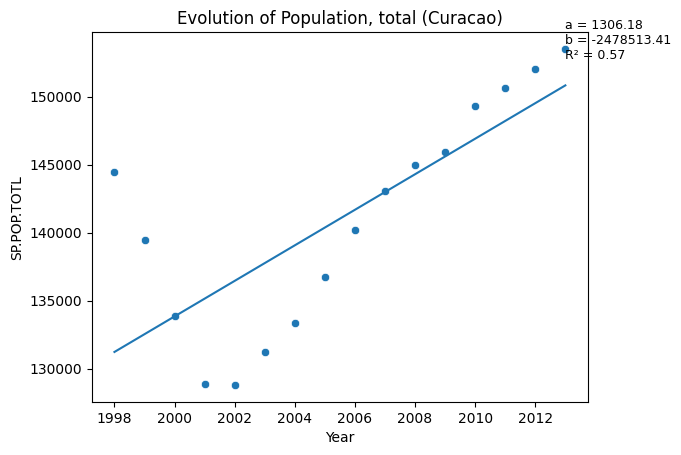

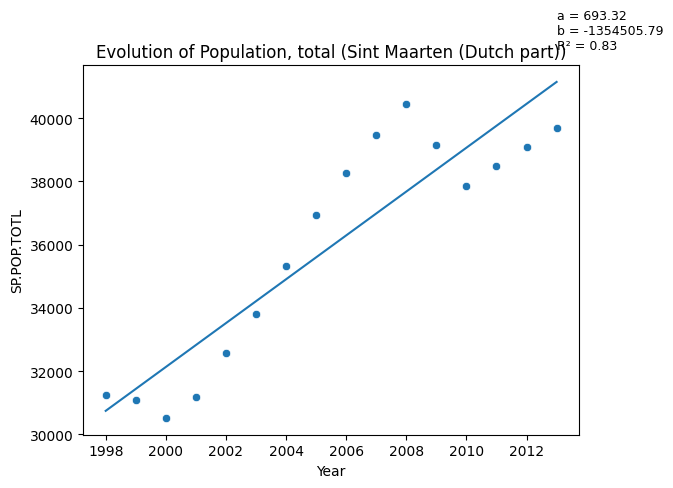

In [ ]:
ind = "SP.POP.TOTL"
year = 2015

countries_nodata_ind_year = ed_stats_data.loc[(ed_stats_data["Indicator Code"] == ind) & (ed_stats_data[str(year)].isnull()), "Country Name"].unique().tolist()

for country in ["countries_nodata_ind_year"]:
    linear_regression(country=country, ind=ind, predict=False, min_year=year, max_year=year)

In [226]:
def countries(x:pd.DataFrame):
    d={}
    d['Count Countries'] = x["Country Code"].count()
    d['List Countries'] = list(x['Country Code'])
    return pd.Series(d, index=['Count Countries', 'List Countries'])

countries_by_ind = ed_stats_data.loc[:, ["Country Code", "Indicator Name"]+['2014']].dropna(how='all', subset=['2014']).groupby('Indicator Name').apply(countries).sort_values("Count Countries", ascending=False).reset_index()
#countries_by_ind = ed_stats_data.loc[:, ["Country Code", "Indicator Name"]+[str(y) for y in ed_stats_data.columns[4:-1] if int(y) in range(1999, 2015)]].dropna(how='all', subset=[str(y) for y in ed_stats_data.columns[4:-1] if int(y) in range(1999, 2015)]).groupby('Indicator Name').apply(countries).sort_values("Count Countries", ascending=False).reset_index()
#countries_by_ind

common_countries = [countries_by_ind.loc[0, "List Countries"]]
count_common_countries = [len(countries_by_ind.loc[0, "List Countries"])]
for i in range(1, countries_by_ind.shape[0]):
    new_list = list(set(common_countries[-1]) & set(countries_by_ind.loc[i, "List Countries"]))
    common_countries.append(new_list)
    count_common_countries.append(len(new_list))

countries_by_ind["Common Countries"] = pd.Series(common_countries)
countries_by_ind["Count Common Countries"] = pd.Series(count_common_countries)
countries_by_ind

C:\Users\HCYF5290\AppData\Local\Temp\1\ipykernel_21648\1999080484.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  countries_by_ind = ed_stats_data.loc[:, ["Country Code", "Indicator Name"]+['2014']].dropna(how='all', subset=['2014']).groupby('Indicator Name').apply(countries).sort_values("Count Countries", ascending=False).reset_index()


Indicator Name  Count Countries  \
0                          Population growth (annual %)              229   
1                                     Population, total              229   
2     Population of the official age for upper secon...              222   
3                       Internet users (per 100 people)              222   
4     Population of the official age for lower secon...              221   
...                                                 ...              ...   
1967  EGRA: Correct Letter Sounds Read Per Minute (M...                1   
1968  EGRA: Correct Letter Sounds Read Per Minute (M...                1   
1969  EGRA: Correct Letter Sounds Read Per Minute (M...                1   
1970  EGRA: Correct Letter Sounds Read Per Minute (M...                1   
1971  EGRA: Correct Non-Words Read Per Minute (Mean)...                1   

                                         List Countries  \
0     [EAS, EAP, EMU, ECS, ECA, HPC, HIC, LCN, LAC, ...   
1     [EAS, EAP, EMU, ECS, ECA, HPC, HIC, LCN, LAC, ...   
2     [ARB, EAS, EAP, EMU, ECS, ECA, EUU, HPC, HIC, ...   
3     [EAS, EAP, EMU, ECS, ECA, HPC, HIC, LCN, LAC, ...   
4     [ARB, EAS, EAP, EMU, ECS, ECA, EUU, HPC, HIC, ...   
...                                                 ...   
1967                                              [ZMB]   
1968                                              [ZMB]   
1969                                              [PHL]   
1970                                              [PHL]   
1971                                              [TZA]   

                                       Common Countries  \
0     [EAS, EAP, EMU, ECS, ECA, HPC, HIC, LCN, LAC, ...   
1     [BRB, NPL, LIE, AZE, BGD, COG, GTM, BRA, TTO, ...   
2     [BRB, NPL, LIE, AZE, BGD, COG, GTM, BRA, TTO, ...   
3     [LIE, NPL, BRB, AZE, BGD, COG, GTM, BRA, TTO, ...   
4     [BRB, NPL, LIE, AZE, BGD, COG, GTM, BRA, TTO, ...   
...                                                 ...   
1967                                                 []   
1968                                                 []   
1969                                                 []   
1970                                                 []   
1971                                                 []   

      Count Common Countries  
0                        229  
1                        229  
2                        214  
3                        211  
4                        210  
...                      ...  
1967                       0  
1968                       0  
1969                       0  
1970                       0  
1971                       0  

[1972 rows x 5 columns]

In [147]:
def indicators(x:pd.DataFrame):
    d={}
    d['Count Indicators'] = x["Indicator Code"].count()
    d['List Indicators'] = list(x.dropna(how='all', subset=ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()])['Indicator Code'])
    return pd.Series(d, index=['Count Indicators', 'List Indicators'])

indicators_by_country = ed_stats_data.loc[ed_stats_data["Country Code"].isin(ed_stats_country.loc[ed_stats_country["Special Notes"].fillna('').str.contains('aggregate'), "Country Code"])].groupby('Country Code').apply(indicators).sort_values("Count Indicators", ascending=False).reset_index()
#indicators_by_country

common_indicators = [indicators_by_country.loc[0, "List Indicators"]]
count_common_indicators = [len(indicators_by_country.loc[0, "List Indicators"])]
for i in range(1, indicators_by_country.shape[0]):
    new_list = list(set(common_indicators[-1]) & set(indicators_by_country.loc[i, "List Indicators"]))
    common_indicators.append(new_list)
    count_common_indicators.append(len(new_list))

indicators_by_country["Common Indicators"] = pd.Series(common_indicators)
indicators_by_country["Count Common Indicators"] = pd.Series(count_common_indicators)
indicators_by_country

C:\Users\HCYF5290\AppData\Local\Temp\1\ipykernel_11932\430835647.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  indicators_by_country = ed_stats_data.loc[ed_stats_data["Country Code"].isin(ed_stats_country.loc[ed_stats_country["Special Notes"].fillna('').str.contains('aggregate'), "Country Code"])].groupby('Country Code').apply(indicators).sort_values("Count Indicators", ascending=False).reset_index()


Country Code  Count Indicators  \
0           ARB              3665   
1           EAP              3665   
2           EAS              3665   
3           ECA              3665   
4           ECS              3665   
5           EMU              3665   
6           EUU              3665   
7           HIC              3665   
8           HPC              3665   
9           LAC              3665   
10          LCN              3665   
11          LDC              3665   
12          LIC              3665   
13          LMC              3665   
14          LMY              3665   
15          MEA              3665   
16          MIC              3665   
17          MNA              3665   
18          NAC              3665   
19          OED              3665   
20          SAS              3665   
21          SSA              3665   
22          SSF              3665   
23          UMC              3665   
24          WLD              3665   

                                      List Indicators  \
0   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
1   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
2   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
3   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
4   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
5   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
6   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
7   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
8   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
9   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
10  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
11  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
12  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
13  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
14  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
15  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
16  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
17  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
18  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
19  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
20  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
21  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
22  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
23  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   
24  [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...   

                                    Common Indicators  Count Common Indicators  
0   [SE.PRM.TENR, SE.PRM.TENR.FE, UIS.NERA.1.GPI, ...                      374  
1   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      348  
2   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      348  
3   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      346  
4   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      346  
5   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      332  
6   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
7   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
8   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
9   [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
10  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
11  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
12  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
13  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
14  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
15  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
16  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
17  [SE.PRM.PRIV.ZS, UIS.FEP.4, UIS.MS.56.T, UIS.E...                      331  
18  [SE.PRM.PRIV.Z

In [613]:
# Weighted average of each score is done before summing all scores
demo_score_weights = {"UIS.E.3":4, "UIS.E.5.B":3, "SE.SEC.ENRL":1, "SH.DYN.MORT":-0.75}
economic_score_weights = {"NY.GDP.PCAP.CD":2, "NY.GDP.MKTP.CD":1}
need_score_weights = {"UIS.PTRHC.56":-1, "SE.XPD.TOTL.GB.ZS":-1, "SE.XPD.SECO.ZS":-1, "UIS.XUNIT.US.3.FSGOV":-1}
ability_score_weights = {"IT.NET.USER.P2":1, "IT.CMP.PCMP.P2":1}

all_scores_inds = list(demo_score_weights.keys()) + list(economic_score_weights.keys()) + list(need_score_weights.keys()) + list(ability_score_weights.keys())

print(all_scores_inds)

['UIS.E.3', 'UIS.E.5.B', 'SE.SEC.ENRL', 'SH.DYN.MORT', 'NY.GDP.PCAP.CD', 'NY.GDP.MKTP.CD', 'UIS.PTRHC.56', 'SE.XPD.TOTL.GB.ZS', 'SE.XPD.SECO.ZS', 'UIS.XUNIT.US.3.FSGOV', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2']


<Axes: ylabel='Indicator Code'>

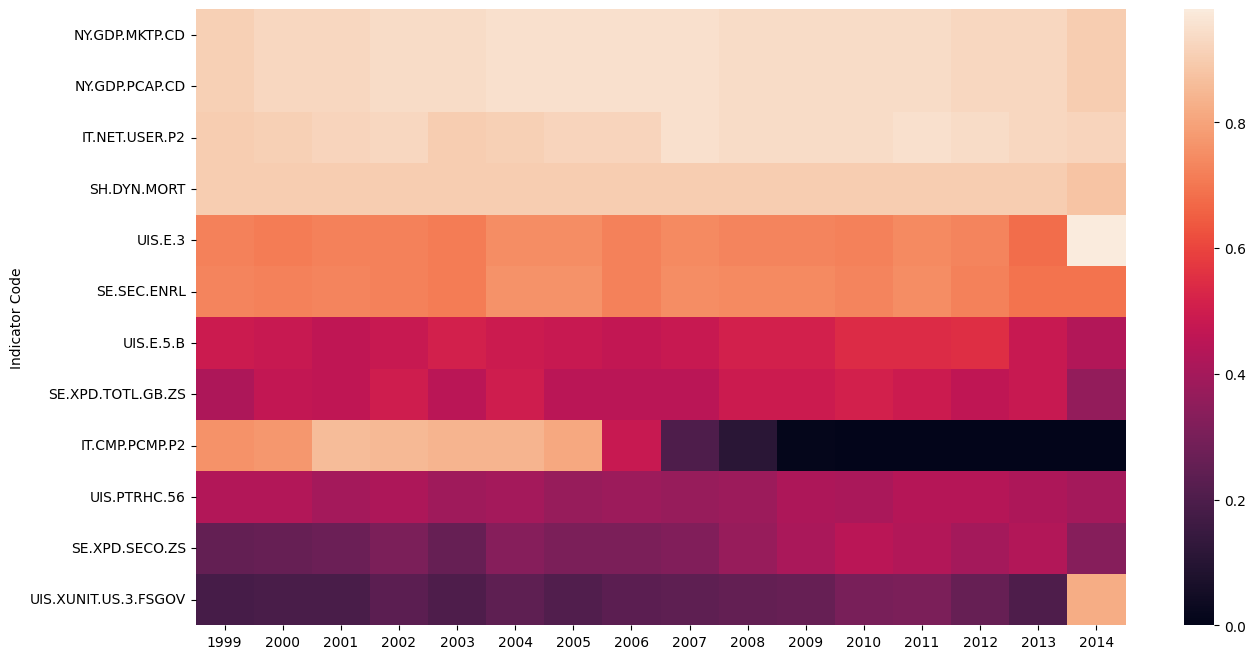

In [602]:
inds_data = ed_stats_data.loc[ed_stats_data["Indicator Code"].isin(all_scores_inds), ["Indicator Code"] +[y for y in ed_stats_data.columns[4:] if int(y) > 1998 and int(y) < 2015]]
confidence_scores = inds_data.groupby('Indicator Code').agg(lambda x: round(x.notna().mean(), 2))


confidence_scores.loc['Total'] = confidence_scores.mean()
confidence_scores['Total'] = confidence_scores.mean(axis=1)
confidence_scores = confidence_scores.sort_values(by="Total", axis=0, ascending = False)
plt.figure(figsize=(15,8))
sns.heatmap(confidence_scores.loc[confidence_scores.index != "Total", confidence_scores.columns != "Total"])


In [585]:
indicators_most_data = ed_stats_data.groupby('Indicator Code')['2014'].agg(lambda x: x.notna().mean().round(2)).sort_values(ascending=False)
indicators_most_data[all_scores_inds + indicators_most_data.iloc[:100].index.tolist()].sort_values(ascending=False).index.value_counts()

Indicator Code
UIS.E.3                  2
UIS.E.3.GPV              2
IT.NET.USER.P2           2
NY.GDP.MKTP.CD           2
NY.GDP.PCAP.PP.KD        2
                        ..
SE.XPD.SECO.ZS           1
SE.XPD.TERT.PC.ZS        1
UIS.PTRHC.3.QUALIFIED    1
UIS.QUTP.3               1
IT.CMP.PCMP.P2           1
Name: count, Length: 112, dtype: int64

In [578]:
def discretize_data(df:pd.DataFrame):
    # Create a copy of the DataFrame to avoid modifying the original
    df_discretized = df.copy()

    # Iterate through each column in the DataFrame
    for col in df_discretized.select_dtypes(include='number').columns:

        # Convert the column to percentiles
        df_discretized[col] = df_discretized[col].rank(pct=True)
            
    return df_discretized


def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Iterate over numeric columns
    for col in df_cleaned.select_dtypes(include=[np.number]).columns:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1

        # Define the bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Remove rows with outliers
        df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = np.nan

    return df_cleaned

#Correleation matrix betwen indicators
def build_matrix_indicators(indicators:list, years:list, countries:list, outlier_handling:Optional[list[Callable]]=None, method:str='pearson', **outlier_handling_args):
    filtered_df = ed_stats_data.loc[(ed_stats_data["Indicator Code"].isin(indicators)) & (ed_stats_data["Country Code"].isin(countries)), ['Indicator Code', 'Country Code'] + [str(y) for y in years if str(y) in ed_stats_data]]
    
    melted_df = filtered_df.melt(id_vars=['Indicator Code', 'Country Code'], var_name='Year', value_name='Value')
    pivot_df = melted_df.pivot_table(index=['Year', 'Country Code'], columns='Indicator Code', values='Value').reset_index()
    pivot_df.drop(columns=['Year', 'Country Code'], inplace=True)
    
    if outlier_handling is not None:
        for f in outlier_handling:
            pivot_df = f(pivot_df, **outlier_handling_args)
    
    matrix = pivot_df.corr(min_periods=1, method=method).round(2)
    
    return matrix
    
def draw_heatmap(corr_matrix:pd.DataFrame):
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig, ax = plt.subplots(figsize=(30, 20))
    ax = sns.heatmap(corr_matrix, ax=ax, annot=True, mask=mask, cmap='vlag', center=0)

def get_relevant_correlations(matrix:pd.DataFrame, treshold=0.7):
    draw_heatmap(matrix)
    df = matrix.reset_index(names=['Indicator A']).melt(id_vars='Indicator A', var_name='Indicator B', value_name='Correlation')
    filtered_df = df[(df['Indicator A'] != df['Indicator B'])]
    filtered_df.loc[:, 'Indicator Pair'] = filtered_df[['Indicator A', 'Indicator B']].apply(lambda x: tuple(sorted(x)), axis=1)

    cleaned_df = filtered_df.drop_duplicates(subset='Indicator Pair').drop(columns='Indicator Pair')

    filled_data_percentage_indicators = ed_stats_data.groupby('Indicator Code').agg(lambda x: x.notna().mean().round(2)).mean(axis=1)

    cleaned_df.loc[:, 'Diff Filled Data'] = abs(filled_data_percentage_indicators.loc[cleaned_df["Indicator A"]].values - filled_data_percentage_indicators.loc[cleaned_df["Indicator B"]].values).round(2)

    final_df = cleaned_df.loc[cleaned_df["Correlation"] > treshold].sort_values("Diff Filled Data", ascending=False)

    return final_df

C:\Users\HCYF5290\AppData\Local\Temp\1\ipykernel_12716\3962729055.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Indicator Pair'] = filtered_df[['Indicator A', 'Indicator B']].apply(lambda x: tuple(sorted(x)), axis=1)


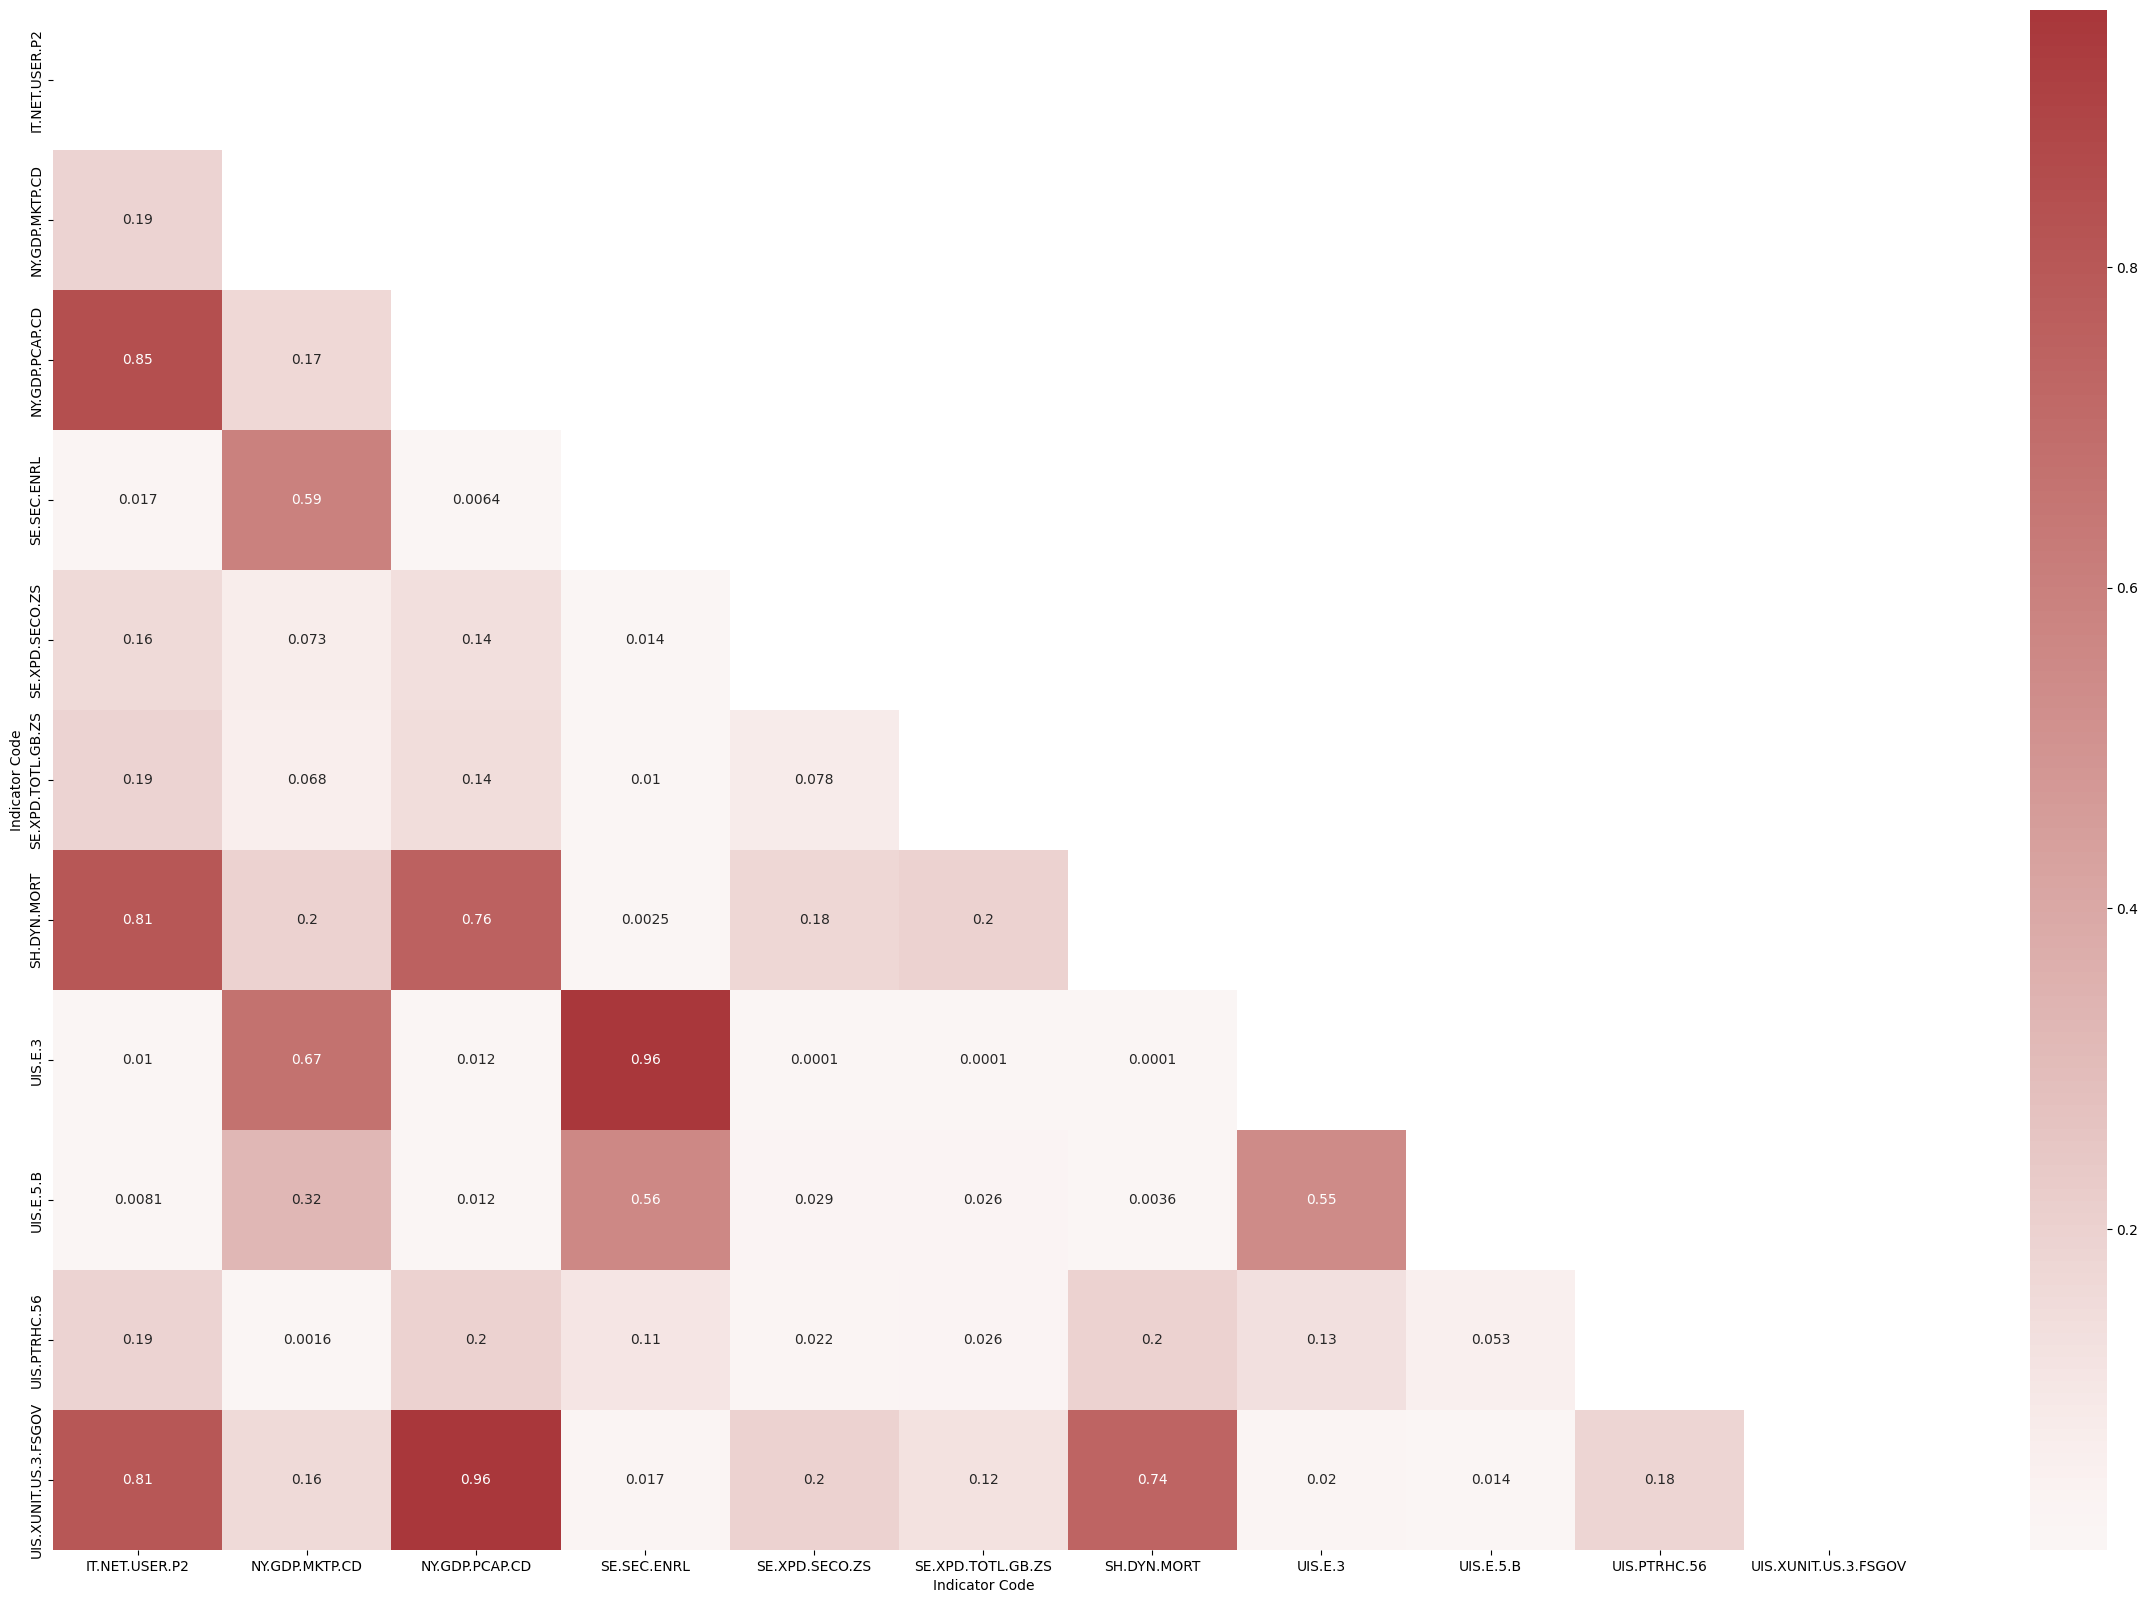

In [603]:
indicators = all_scores_inds # + indicators_most_data.iloc[150:200].index.tolist()
years = ['2014']
countries = ed_stats_country.loc[~(ed_stats_country["Special Notes"].fillna('').str.contains('aggregate')) & ~(ed_stats_country["Region"] == "a") & ~(ed_stats_country["Income Group"] == "a"), "Country Code"]

relevant_correlations = get_relevant_correlations(build_matrix_indicators(indicators, years, countries, outlier_handling=[])**2)

In [581]:
ed_stats_data.loc[(ed_stats_data["Indicator Code"].isin(["NY.GDP.PCAP.CD"])) & (ed_stats_data["Country Code"].isin(countries)), ['Indicator Code', 'Country Code'] + [str(y) for y in years if str(y) in ed_stats_data]].isna().sum()

Indicator Code     0
Country Code       0
2014              19
dtype: int64

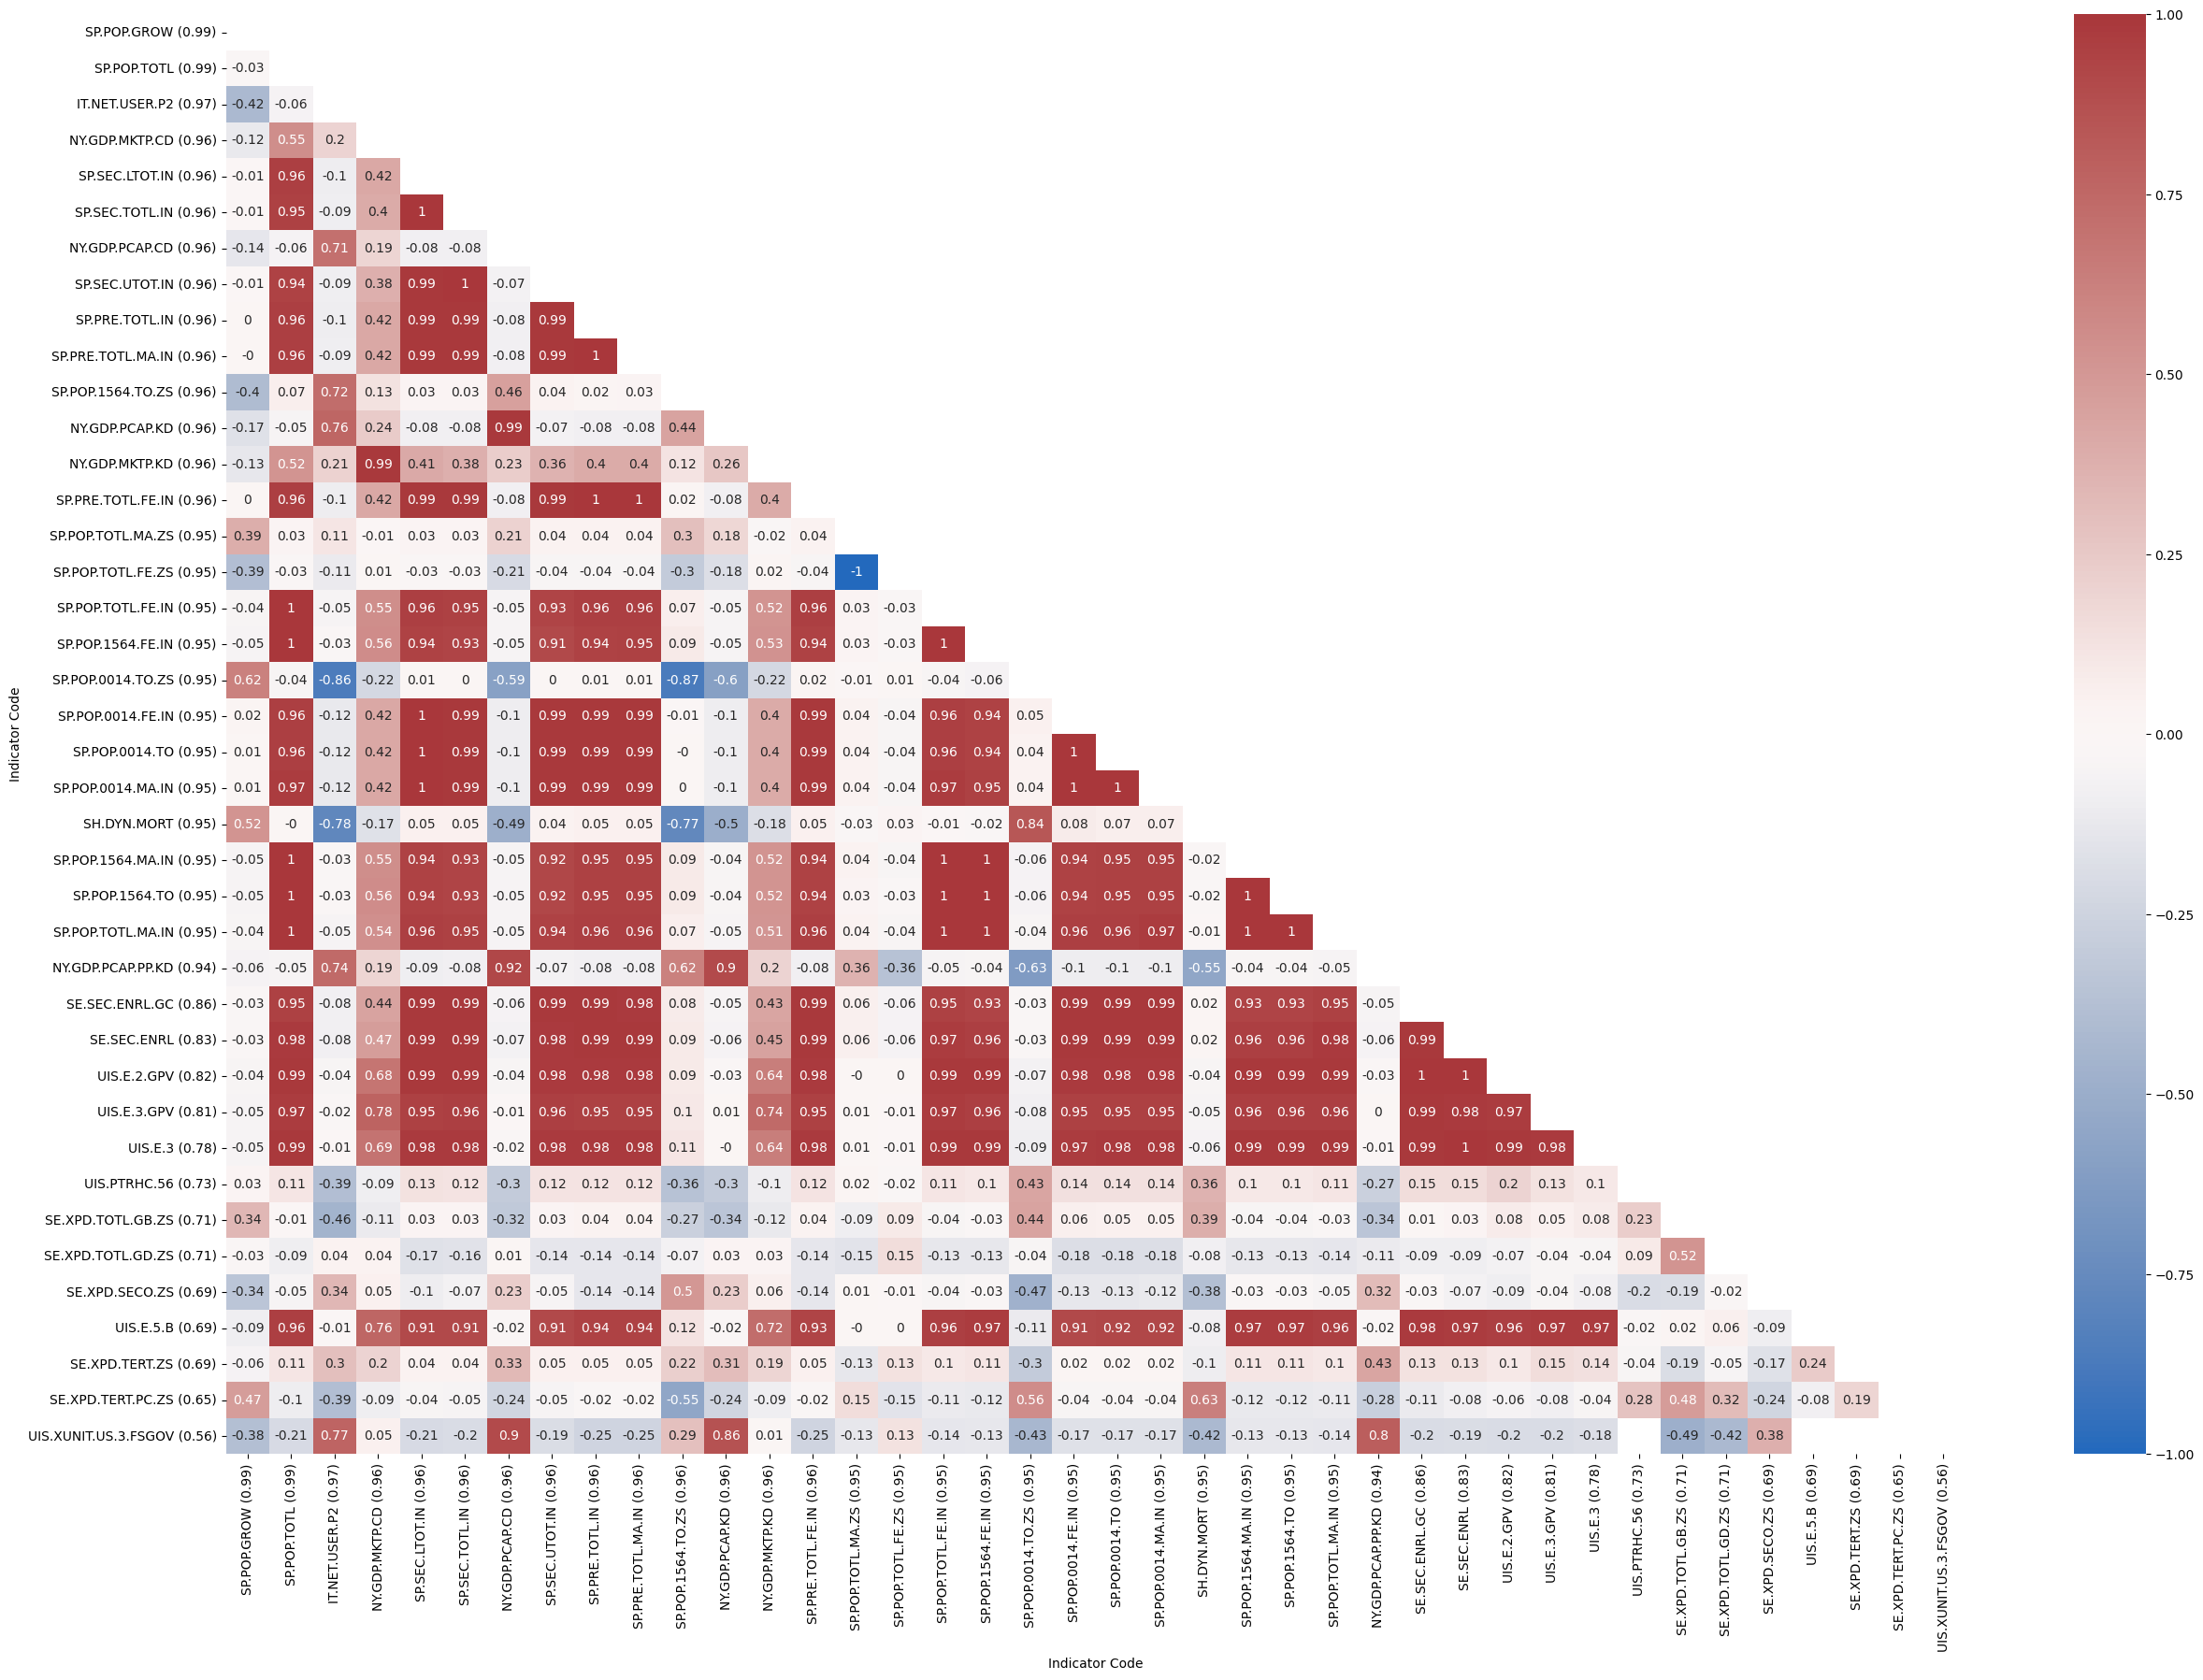

In [444]:
indicators = all_scores_inds + indicators_most_data.iloc[:25].index.tolist()
years = ['2014']
countries = ed_stats_country.loc[~(ed_stats_country["Special Notes"].fillna('').str.contains('aggregate')) & ~(ed_stats_country["Region"] == "a") & ~(ed_stats_country["Income Group"] == "a"), "Country Code"]

draw_heatmap(build_matrix_indicators(indicators, years, countries))

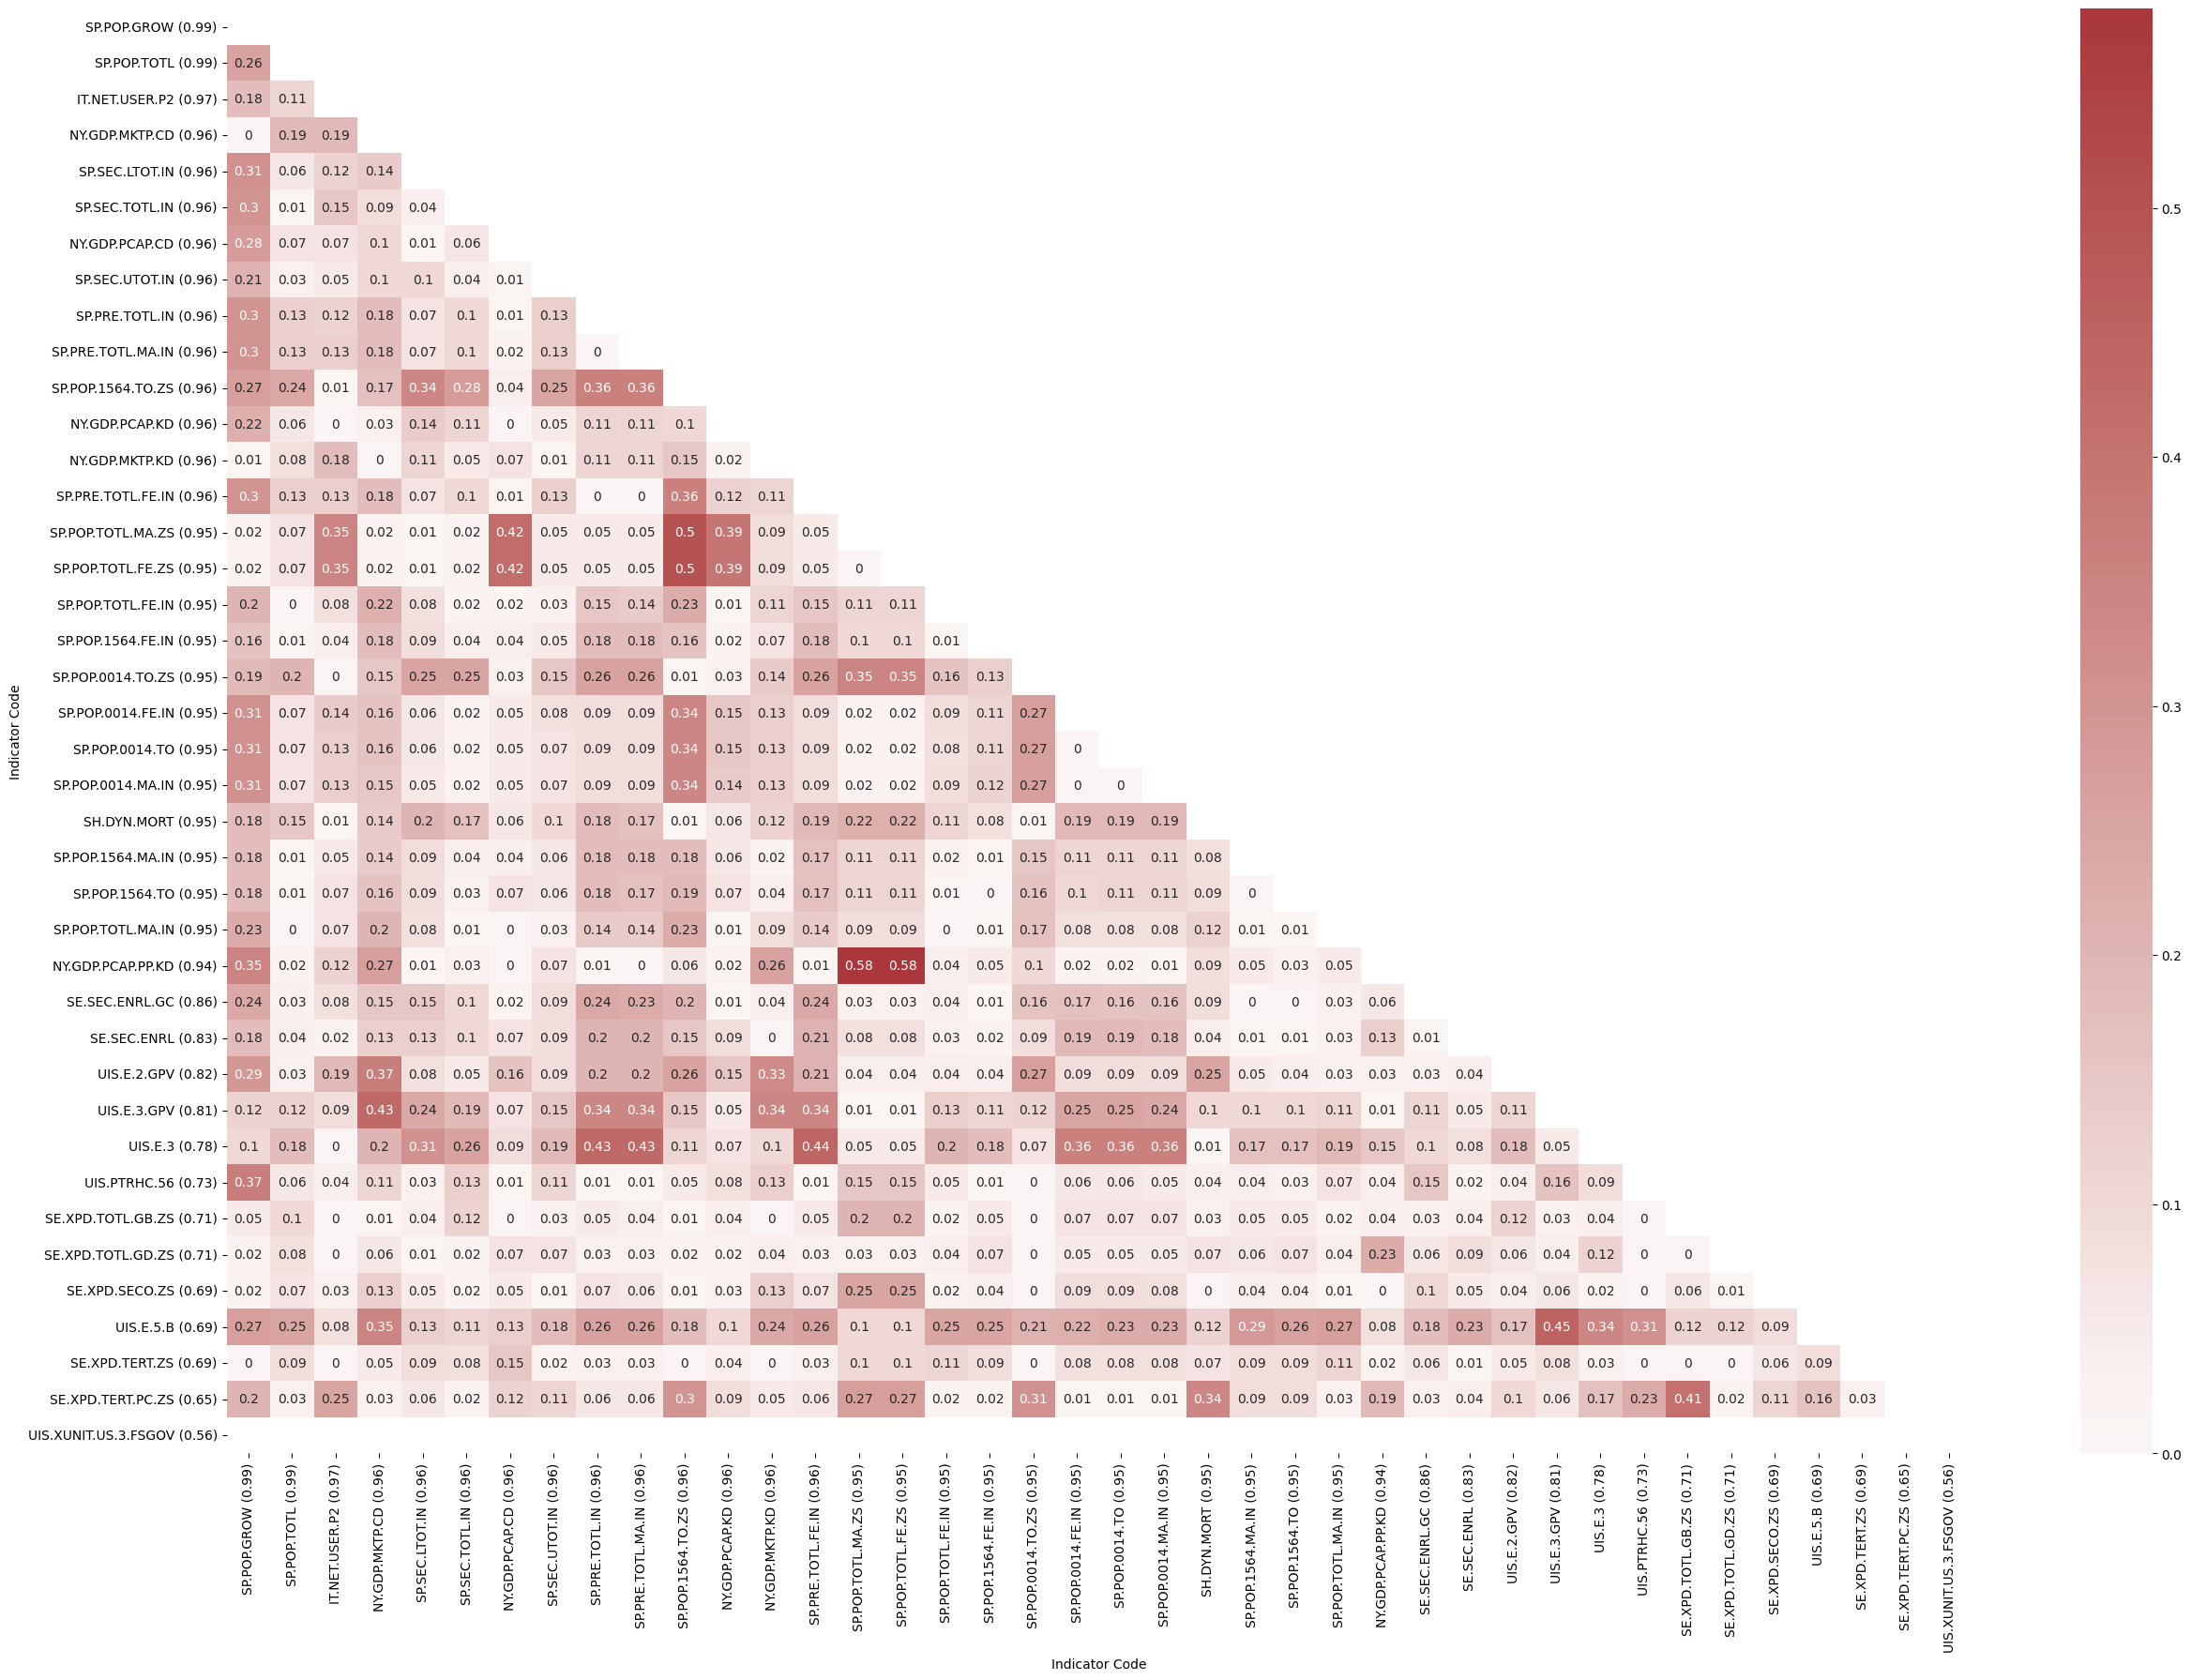

In [453]:
# Visualize if the correlations are resilient to outliers.
# Visualization of the difference between correlation matrix (with outliers) and correlation matrix (without outliers)
draw_heatmap(abs(build_matrix_indicators(indicators, years, countries) - build_matrix_indicators(indicators, years, countries, ignore_outliers=True)))

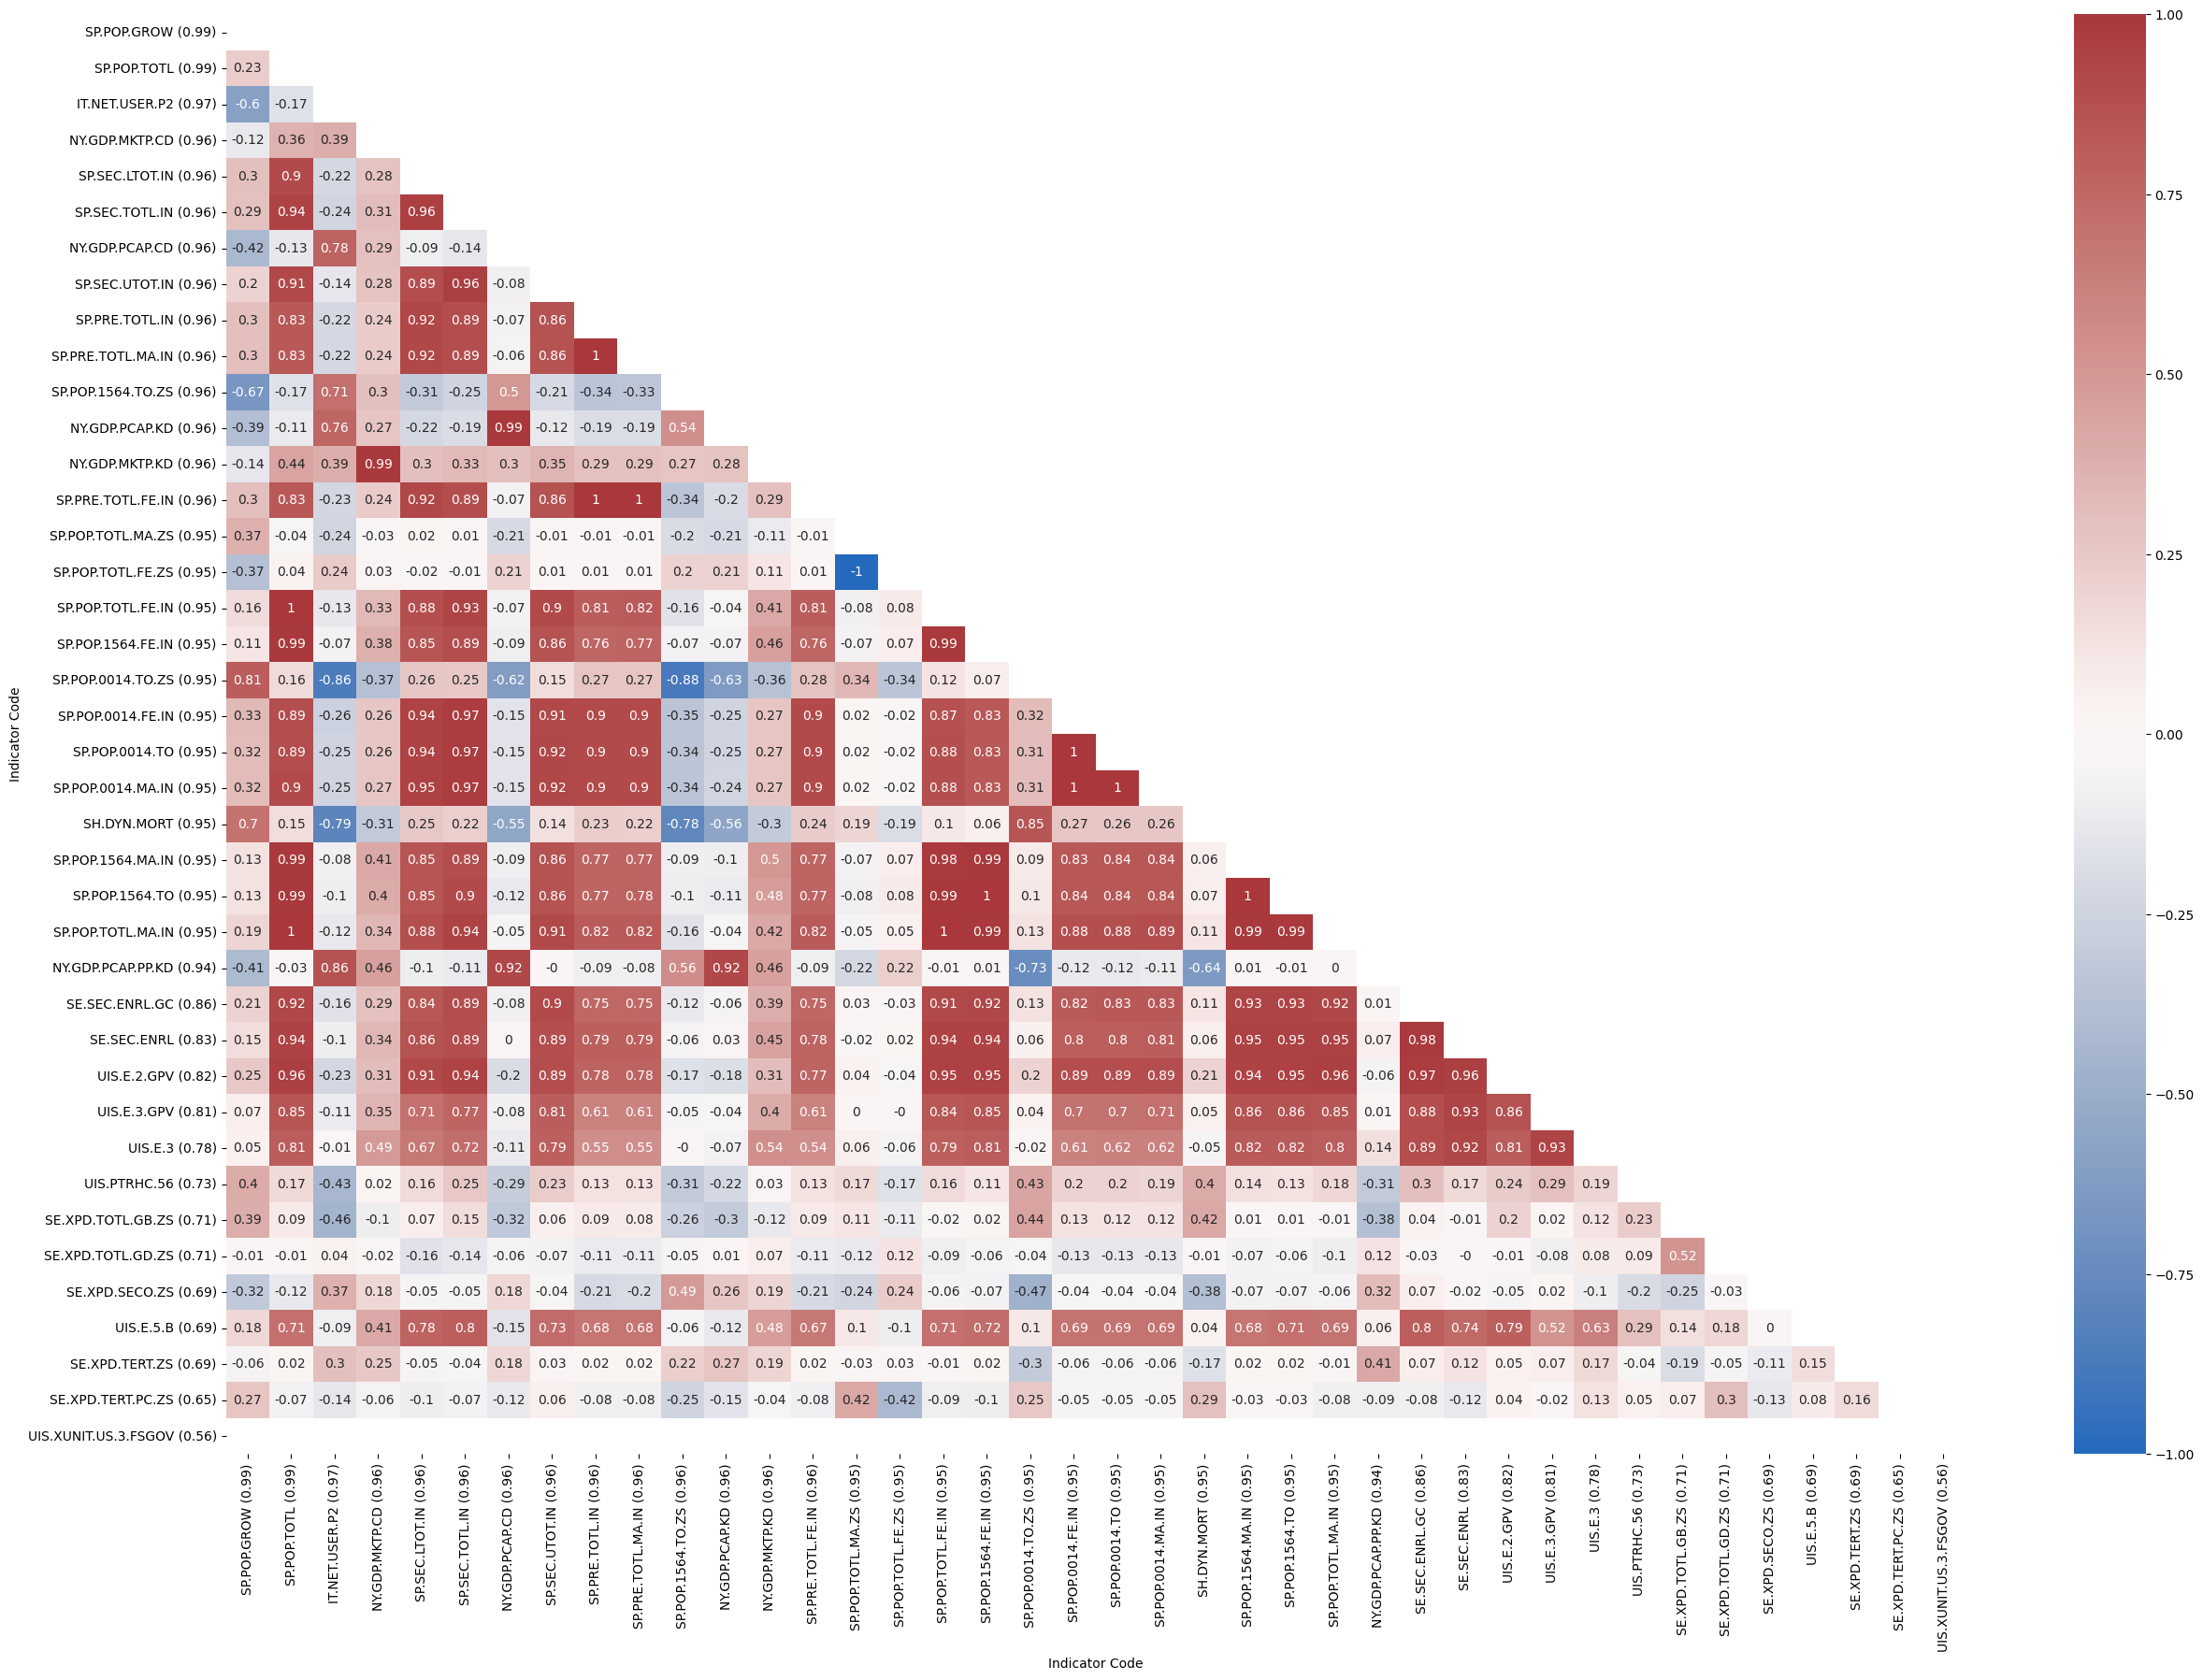

In [443]:
draw_heatmap(build_matrix_indicators(indicators, years, countries, ignore_outliers=True))

np.float64(0.3775)

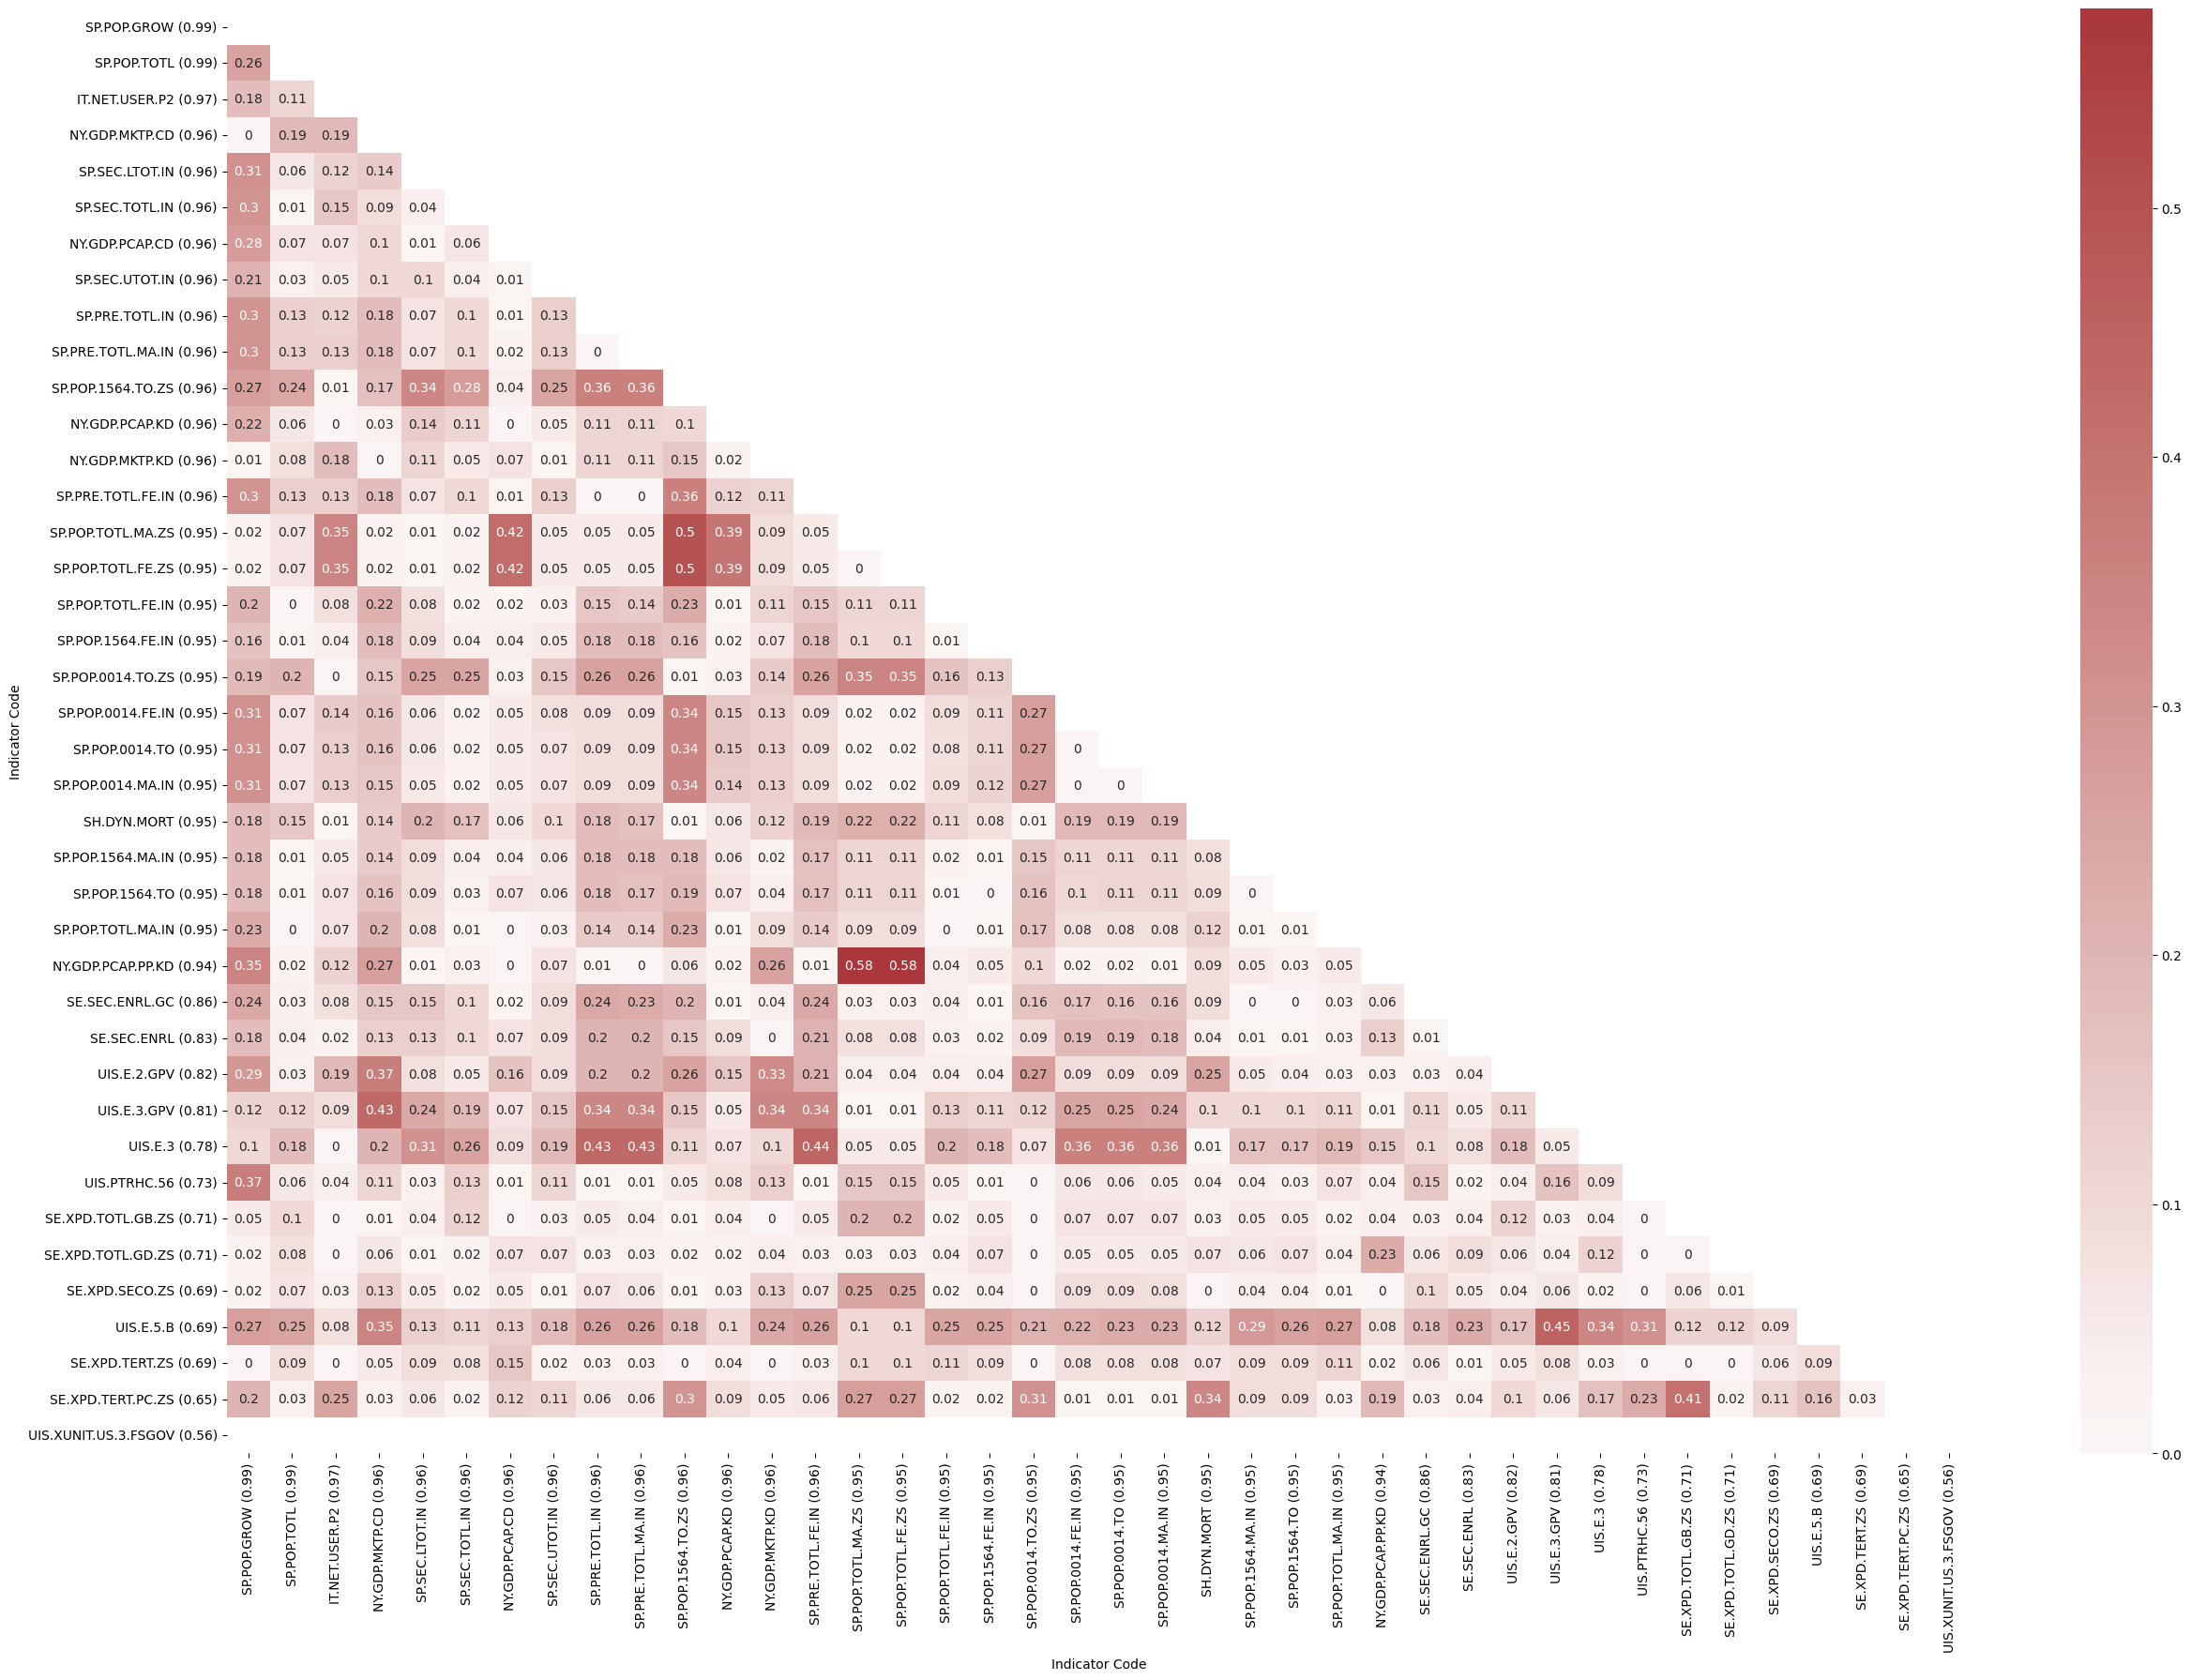

In [459]:
# Visualize if the correlations are resilient to outliers.
# Visualization of the difference between correlation matrix (with outliers) and correlation matrix (without outliers)
difference_matrix = abs(build_matrix_indicators(indicators, years, countries, method='pearson') - build_matrix_indicators(indicators, years, countries, ignore_outliers=True, method='pearson'))
draw_heatmap(difference_matrix)
signficant_change = difference_matrix > 0.1
(signficant_change.sum().sum())/(signficant_change.shape[0]**2)

Correlations between indicators highly depends on outliers. 
Here are some possible actions that could reduce the impact of outliers:
- Discretize values with percentiles or quartiles
- Apply transformations like log or square root
- Removing outliers
- Use other methods (such as 'kendall' or 'spearman') to estimate the correlation between indicators

This analysis will only rely on Pearson coefficient, and outliers will simply be removed.  


Let's look at the percentage of filled data per year for the chosen indicators to determine which year is the more relevant to calculate the scores.

Text(0.5, 0, 'Year')

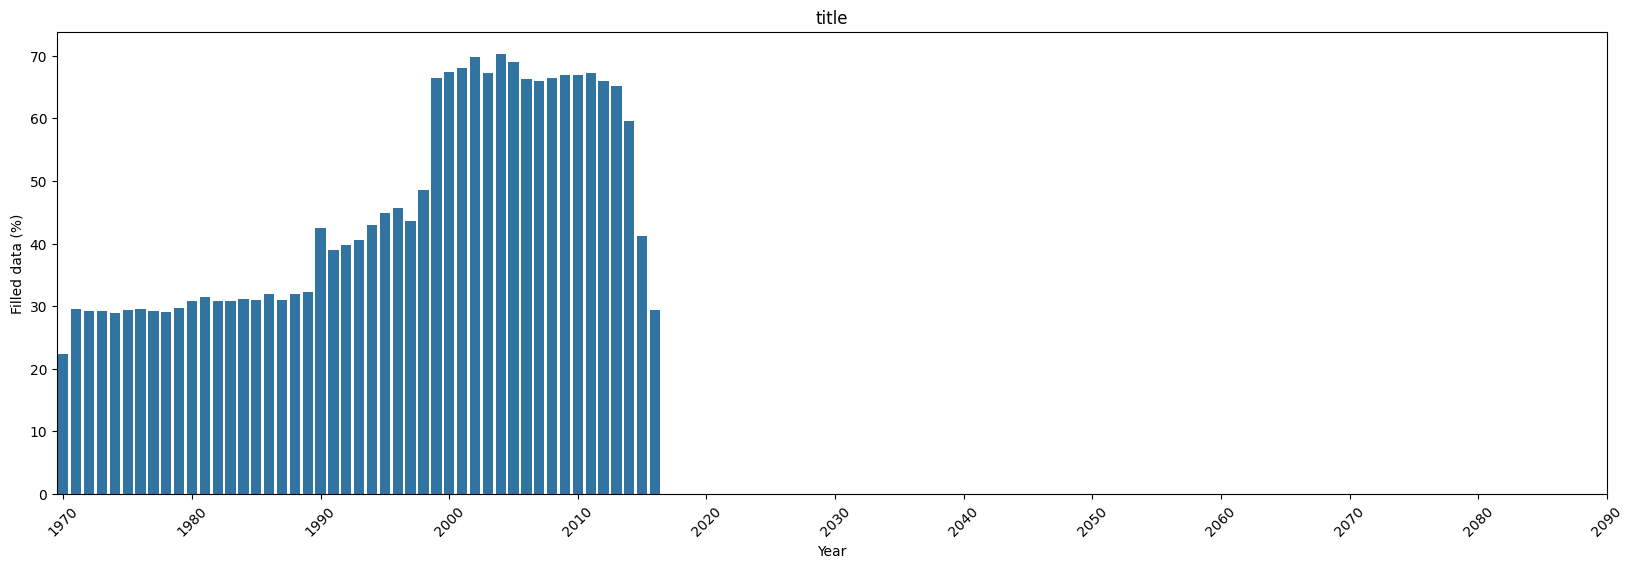

In [325]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(ax=ax, data=100*(1-ed_stats_data.loc[ed_stats_data["Indicator Code"].isin(all_scores_inds), ed_stats_data.columns[ed_stats_data.columns.str.isnumeric()]].isna().mean()))
ax.set_xticks(range(0, 2100-1970, 10))  # Set only those years as ticks
ax.set_xticklabels([str(y) for y in np.arange(1970, 2100, 10)], rotation=45)  # Rotate for better visibility
ax.set_title("title")
ax.set_ylabel("Filled data (%)")
ax.set_xlabel("Year")

Year 2014 seems a good candidate. However, there are more than 60% missing data. We can expect the scores to be quite far from reality.  
We will deal with missing values later, first let's build the scores

In [617]:
import numpy as np
import pandas as pd

def calculate_country_score(inds_country_data, inds_data, ind_weights: dict):       
    # Initialize the score
    ranks = []
    weights = []
    
    # Calculate ranks for each indicator
    for ind, w in ind_weights.items():
        # Check if the indicator is in both the country data and the indicator data
        if ind in inds_country_data.index and not np.isnan(inds_country_data[ind]):

            # Get all data for the indicator
            ind_values = inds_data.loc[ind].values
            
            if len(ind_values) == 0:
                continue  # Handle case where there's no data for this indicator
            value = inds_country_data.loc[ind]  # Get the value for this country and indicator
            rank = np.sum(ind_values < value) / len(ind_values)  # Calculate rank
            ranks.append(rank)
            weights.append(w)

    confidence_score = sum(map(abs, weights))/sum(map(abs, ind_weights.values()))
    
    if len(weights) == 0:
        score = 0
    elif sum(weights) != 0:
        score = np.dot(ranks, weights) / sum(map(abs, weights)) # perform weighted average
    else:
        raise ValueError('Sum of weights is 0. Cannot calculate weighted average.')
        
    return round(score, 2), round(confidence_score, 2)

def calculate_country_year_scores(inds_country_data, inds_data, demo_ind, economic_ind, need_ind, ability_ind):
    
    # Calculate scores for each category
    demo_score, confidence_demo_score = calculate_country_score(inds_country_data, inds_data, demo_ind)
    economic_score, confidence_economic_score = calculate_country_score(inds_country_data, inds_data, economic_ind)
    need_score, confidence_need_score = calculate_country_score(inds_country_data, inds_data, need_ind)
    ability_score, confidence_ability_score = calculate_country_score(inds_country_data, inds_data, ability_ind)
    
    return [demo_score, economic_score, need_score, ability_score], [confidence_demo_score, confidence_economic_score, confidence_need_score, confidence_ability_score]
        

def build_year_score_df(year, countries: list = ed_stats_country["Country Code"].tolist(), 
                         demo_ind=demo_score_weights, economic_ind=economic_score_weights, 
                         need_ind=need_score_weights, ability_ind=ability_score_weights):
        
    year_score_data = []
    
    # Combine all indicator weights into a single list
    all_scores_inds = (
        list(demo_ind.keys()) + 
        list(economic_ind.keys()) + 
        list(need_ind.keys()) + 
        list(ability_ind.keys())
    )

    # Filter relevant indicators data for the specified country and year
    inds_data = ed_stats_data.loc[ed_stats_data["Indicator Code"].isin(all_scores_inds), ["Indicator Code", "Country Code", str(year)]].set_index("Indicator Code")


    for country in countries:
        # Extract country data for the specified year
        inds_country_data = inds_data.loc[inds_data["Country Code"] == country, str(year)]
        scores, confidence_scores = calculate_country_year_scores(
            inds_country_data,
            inds_data.drop(columns="Country Code"),
            demo_ind=demo_score_weights,
            economic_ind=economic_score_weights,
            need_ind=need_score_weights,
            ability_ind=ability_score_weights
        )
        

        total_confidence_score = round(np.mean(confidence_scores), 2)
        total_score = round(sum(scores), 2)

        country_name = ed_stats_country.loc[ed_stats_country["Country Code"] == country, "Short Name"].values[0]
        
        year_score_data.append([country_name] + scores + [total_score, total_confidence_score])
    
    # Create DataFrame from the collected scores
    year_score_df = pd.DataFrame(year_score_data, columns=["Country Name", "Demo Score", "Economic Score", "Need Score", "Ability Score", "Total Score", "Confidence Score"])

    sns.boxplot(year_score_df['Confidence Score'])
    plt.show()
    
    return year_score_df


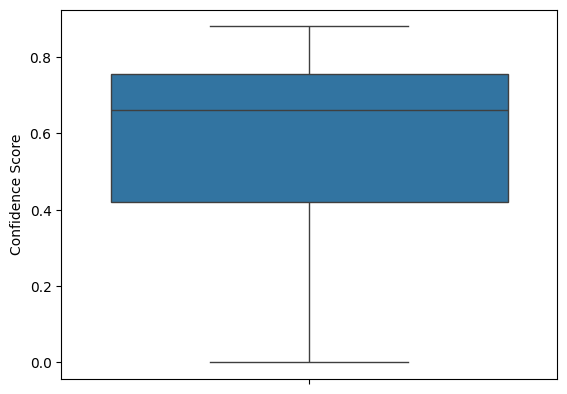

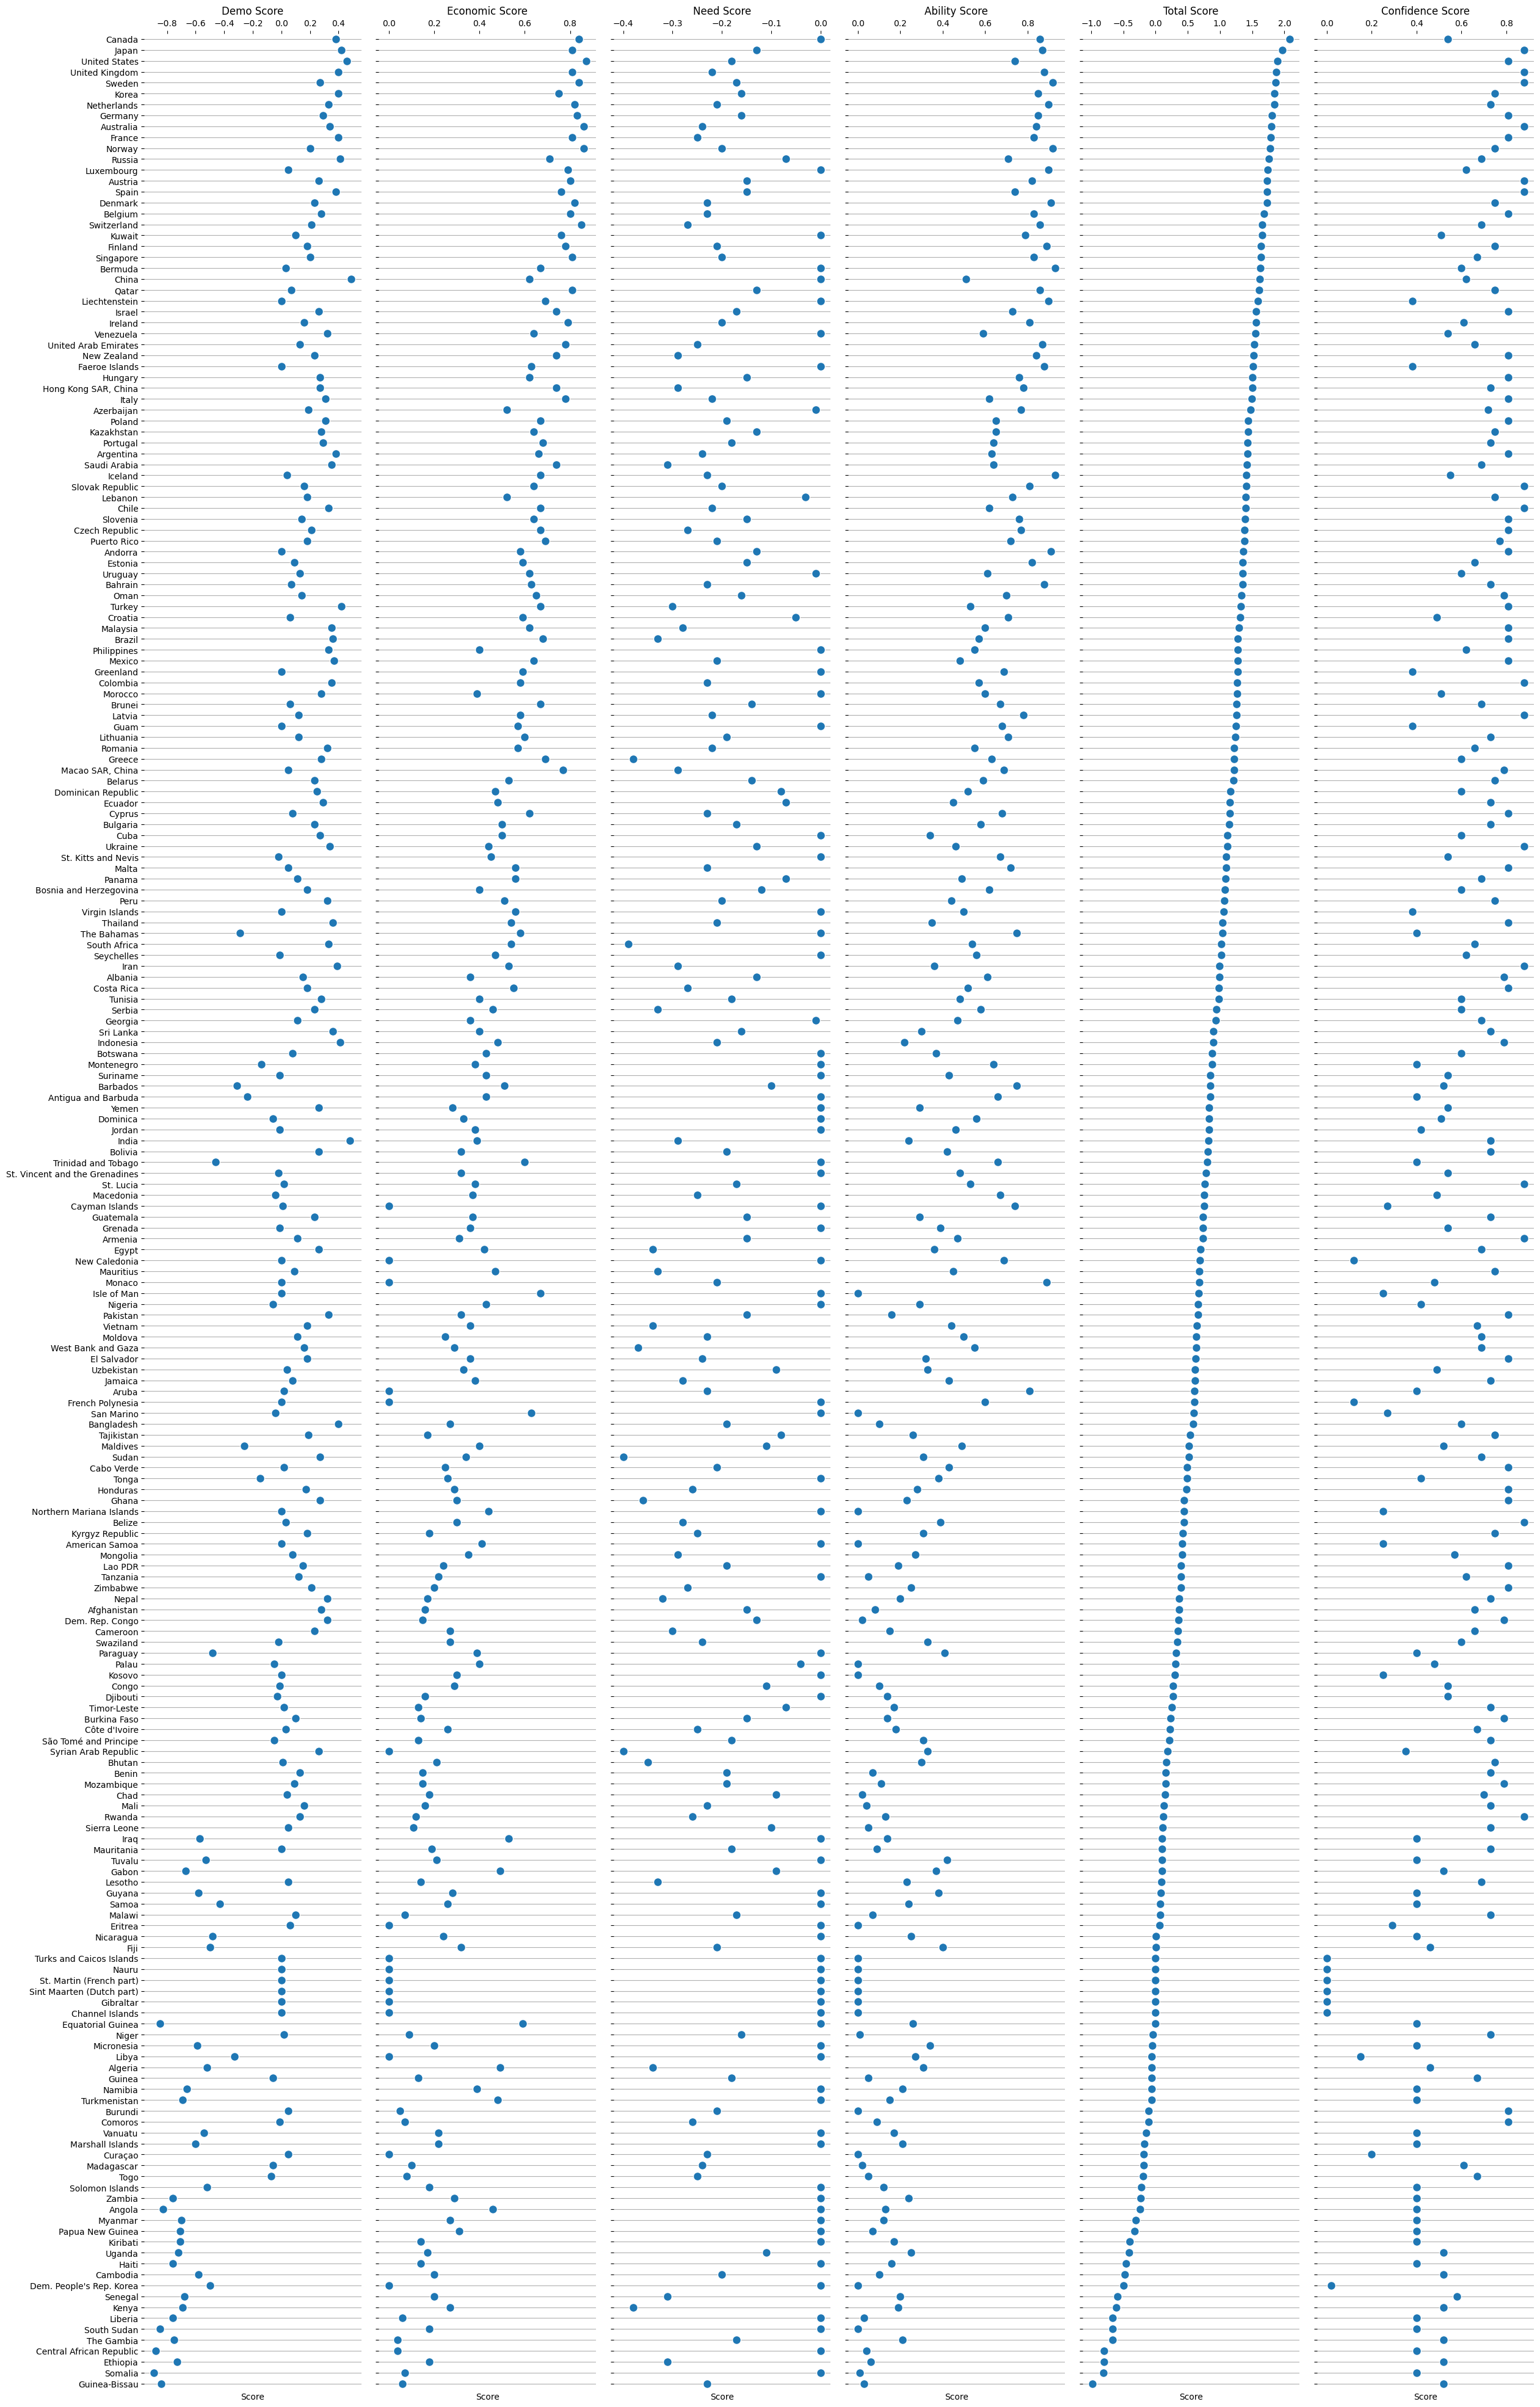

In [620]:
year_score = build_year_score_df('2013', countries=ed_stats_country.loc[~ed_stats_country["Special Notes"].fillna('').str.contains('aggregate'), "Country Code"].tolist()).sort_values(by="Total Score", ascending=False)
# Make the PairGrid
g = sns.PairGrid(year_score,
                 x_vars=year_score.columns[1:], y_vars=["Country Name"],
                 height=40, aspect=0.1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Score", ylabel="")

# Use semantically meaningful titles for the columns
titles = year_score.columns[1:]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Set X axis position to top of graph
    ax.xaxis.set_ticks_position("top")

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

Now let's try to reduce the portion of mssing values.  
Several options have been identified to have more data to work with :
1. Linear regression with other indicators
2. Increasing the number of years taken into account, then take the most recent data
3. 